## Depth integrated tracer on shelf per km along shelf, splitted into inner shelf and outter shelf

In [42]:
#import gsw as sw # Gibbs seawater package

from math import *

import matplotlib.pyplot as plt

import matplotlib.colors as mcolors

%matplotlib inline

#from MITgcmutils import rdmds

from netCDF4 import Dataset

import numpy as np

import os 

import pandas as pd

import pylab as pl

import scipy.io

import scipy as spy

import seaborn as sns

import sys

In [43]:
lib_path = os.path.abspath('../../Building_canyon/BuildCanyon/PythonModulesMITgcm') # Add absolute path to my python scripts
#lib_path = os.path.abspath('../BuildCanyon/PythonModulesMITgcm') # Add absolute path to my python scripts

sys.path.append(lib_path)

import ReadOutTools_MITgcm as rout 
import MetricsPythonTools as mpt


In [44]:
sns.set()
sns.set_style('white')
sns.set_context('talk')

In [45]:
# plotting functions
def plotCanyonPos(ax,UpX,DnX):
    ax.axvline(UpX,color='0.70',linestyle='--')
    ax.axvline(DnX,color='0.70',linestyle='--')


In [46]:
#Exp
CGrid = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run03/gridGlob.nc' 
CGridOut = Dataset(CGrid)

CGridNoC = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run07/gridGlob.nc' 
CGridNoCOut = Dataset(CGridNoC)

Ptracers = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run03/ptracersGlob.nc' 
PtracersOut = Dataset(Ptracers)
Ptracers11 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run11/ptracersGlob.nc' 
Ptracers12 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run12/ptracersGlob.nc' 
Ptracers17 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run17/ptracersGlob.nc' 

Ptracers14 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run14/ptracersGlob.nc' 
Ptracers15 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run15/ptracersGlob.nc' 
Ptracers16 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run16/ptracersGlob.nc' 

Ptracers18 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run18/ptracersGlob.nc' 
Ptracers19 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run19/ptracersGlob.nc' 

Ptracers043D = '/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF/run04/ptracersGlob.nc' 
Ptracers053D = '/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF/run05/ptracersGlob.nc' 
Ptracers063D = '/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF/run06/ptracersGlob.nc' 
Ptracers073D = '/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF/run07/ptracersGlob.nc' 

PtracersNoC = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run07/ptracersGlob.nc' 
PtracersOutNoC = Dataset(PtracersNoC)

State = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run03/stateGlob.nc' 
StateNoC = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run07/stateGlob.nc' 




In [47]:
# General input

nx = 360
ny = 360
nz = 90
nt = 19 # t dimension size 
numTr = 22 # number of tracers in total (CNT =22, 3D = 4, total = 19)

rc = CGridNoCOut.variables['RC']
dxf = CGridNoCOut.variables['dxF']
xc = rout.getField(CGridNoC, 'XC') # x coords tracer cells
yc = rout.getField(CGridNoC, 'YC') # y coords tracer cells

rA = rout.getField(CGridNoC, 'rA') 
depth = rout.getField(CGrid, 'Depth')
drF = CGridNoCOut.variables['drF'] # vertical distance between faces
drC = CGridNoCOut.variables['drC'] # vertical distance between centers

hFacC = rout.getField(CGridNoC, 'HFacC')
mask_NoC = rout.getMask(CGridNoC, 'HFacC')

labels = ['Kv: out=1E-7, in=1E-3, Kiso=1','Kv: out=1E-7,in=1E-4, Kiso=1','Kv: out=1E-5, in=1E-3, Kiso=1',
          'Kv: out=1E-5, in=1E-4, Kiso=1','Kv=1E-5, Kiso=1','Kv=1E-4, Kiso=1','Kv=1E-3, Kiso=1','Kv=3.8E-5, Kiso=10',
          'Kv=2.8E-5, Kiso=10','Kv=1.3E-5, Kiso=10','Kv_noc=1E-5, Kiso=1','Kv_noc=1E-4, Kiso=1','Kv_noc=1E-3, Kiso=1',
          'Kv=1E-5, Kiso=10','Kv=1E-4, Kiso=10','Kv=1E-3, Kiso=10','Kv=1E-5, Kiso=0.1','Kv=1E-4, Kiso=0.1','Kv=1E-3, Kiso=0.1',
          'Kv=3.8E-5, Kiso=1','Kv=2.8E-5, Kiso=1','Kv=1.3E-5, Kiso=1']

times = np.arange(0,nt,1)

#print(drC[:])
#print(np.shape(drC))

In [48]:
def HCW_Tracer_AlongShelf_Split(Tr,MaskC,nzlim,rA,hFacC,drF,yin,yfin,zfin,xi,yi):
  '''
  INPUT----------------------------------------------------------------------------------------------------------------
    Tr    : Array with concentration values for a tracer. Until this function is more general, this should be size 19x90x360x360
    MaskC : Land mask for tracer
    nzlim : The nz index under which to look for water properties
    rA    : Area of cell faces at C points (360x360)
    fFacC : Fraction of open cell (90x360x360)
    drF   : Distance between cell faces (90)
    yin   : first across-shore index of shelf division
    yfin  : final across-shore index of shelf division
    zfin  : shelf break index + 1 
    xi    : initial profile x index
    yi    : initial profile y index
    
    OUTPUT----------------------------------------------------------------------------------------------------------------
    VolWaterHighConc =  Array with the volume of water over the shelf [t,360] at every time output.
    Total_Tracer =  Array with the mass of tracer (m^3*[C]*l/m^3) at each x-position over the shelf [t,360] at 
                    every time output. 
                                                
  -----------------------------------------------------------------------------------------------------------------------
  '''
  maskExp = mpt.maskExpand(MaskC,Tr)

  TrMask=np.ma.array(Tr,mask=maskExp)   
    
  trlim = TrMask[0,nzlim,yi,xi]
    
  print('tracer limit concentration is: ',trlim)
    
    
  # mask cells with tracer concentration < trlim on shelf
  HighConc_Masked = np.ma.masked_less(TrMask[:,:zfin,yin:yfin,:], trlim) 
  HighConc_Mask = HighConc_Masked.mask
    
  #Get volume of water of cells with relatively high concentration
  rA_exp = np.expand_dims(rA[yin:yfin,:],0)
  drF_exp = np.expand_dims(np.expand_dims(drF[:zfin],1),1)
  rA_exp = rA_exp + np.zeros(hFacC[:zfin,yin:yfin,:].shape)
  drF_exp = drF_exp + np.zeros(hFacC[:zfin,yin:yfin,:].shape)
    
  ShelfVolume = hFacC[:zfin,yin:yfin,:]*drF_exp*rA_exp
  ShelfVolume_exp = np.expand_dims(ShelfVolume,0)
  ShelfVolume_exp = ShelfVolume_exp + np.zeros(HighConc_Mask.shape)
    
  HighConc_CellVol = np.ma.masked_array(ShelfVolume_exp,mask = HighConc_Mask) 
  VolWaterHighConc =np.ma.sum(np.ma.sum(HighConc_CellVol,axis = 1),axis=1)
    
   #Get total mass of tracer on shelf
  Total_Tracer = np.ma.sum(np.ma.sum(ShelfVolume_exp*TrMask[:,:zfin,yin:yfin,:]*1000.0,axis = 1),axis=1)
   # 1 m^3 = 1000 l
    
  return (VolWaterHighConc, Total_Tracer)

y index for shelfbreak, 100m depth and 50 m depth
depth[227,0] is 147.753973 
depth[267,0] is 100.000000 
depth[299,0] is 50.000000 


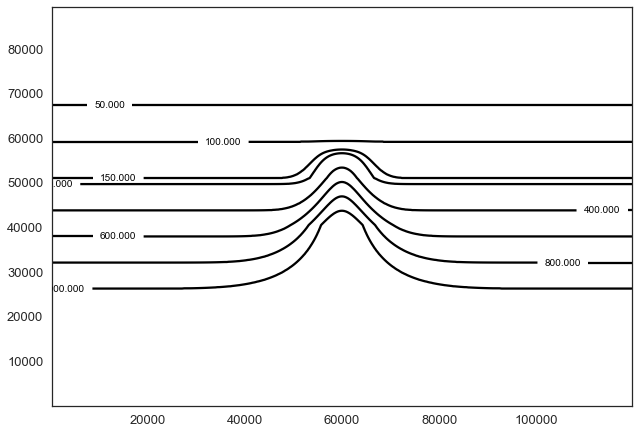

In [49]:
contour = plt.contour(xc[1,:],yc[:,1],depth,[50,100,150,200,400,600,800,1000,1200],colors='k')
plt.clabel(contour, inline=1, fontsize=10)

print('y index for shelfbreak, 100m depth and 50 m depth')
print('depth[227,0] is %f ' % depth[227,0])
print('depth[267,0] is %f ' % depth[267,0])
print('depth[299,0] is %f ' % depth[299,0])

In [50]:
Tr1 = rout.getField(Ptracers, 'Tr1')
#S = rout.getField(State, 'S')
Tr1NoC = rout.getField(PtracersNoC, 'Tr1')
#SNoC = rout.getField(StateNoC, 'S')

## Changing Diffusivity

In [59]:
HCWout,TrMassout = HCW_Tracer_AlongShelf_Split(Tr1,mask_NoC,30,rA,hFacC,drF,227,267,30,180,50)
HCWin,TrMassin = HCW_Tracer_AlongShelf_Split(Tr1,mask_NoC,30,rA,hFacC,drF,267,299,30,180,50)

HCWNoCout,TrMassNoCout = HCW_Tracer_AlongShelf_Split(Tr1NoC,mask_NoC,30,rA,hFacC,drF,227,267,30,180,50)
HCWNoCin,TrMassNoCin = HCW_Tracer_AlongShelf_Split(Tr1NoC,mask_NoC,30,rA,hFacC,drF,267,299,30,180,50)

#HSW,SMass = HCW_Tracer_AlongShelf_Split(S,mask_NoC,30,rA,hFacC,drF,227,30,180,50)
#HSWNoC,SMassNoC = HCW_Tracer_AlongShelf_Split(SNoC,mask_NoC,30,rA,hFacC,drF,227,30,180,50)


('tracer limit concentration is: ', 7.3974895)
('tracer limit concentration is: ', 7.3974895)
('tracer limit concentration is: ', 7.3974895)
('tracer limit concentration is: ', 7.3974895)


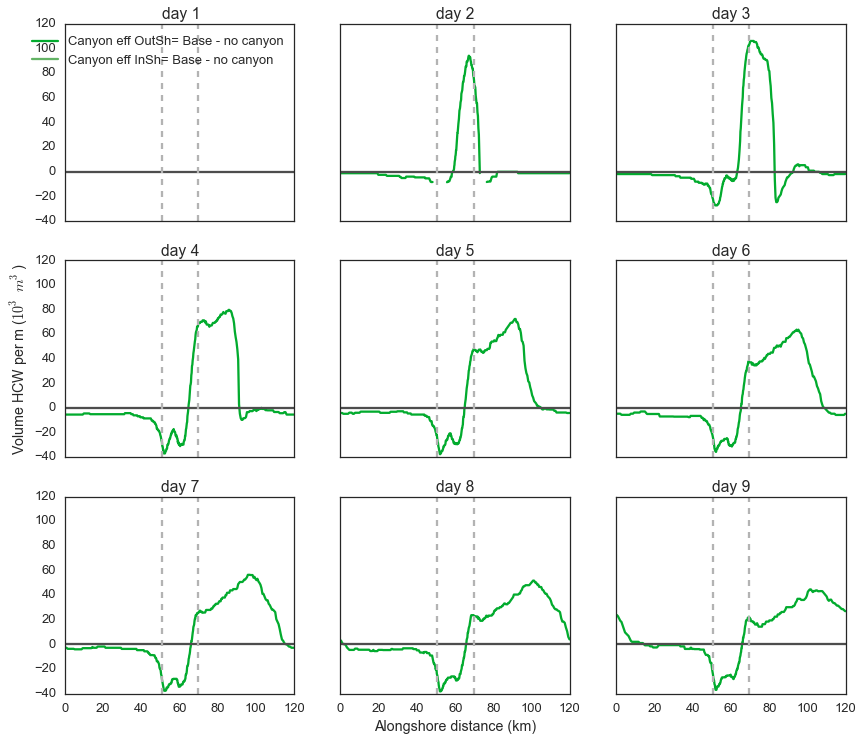

In [62]:
fig,((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9)) = plt.subplots(3,3, figsize = (14,12),sharex=True, sharey=True)

axlist = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9]

times = [2,4,6,8,10,12,14,16,18]
for ii,ax in zip(times,axlist):
    
    ax.plot(xc[1,:]/1000,(HCWout[ii,:]-HCWNoCout[ii,:])/(1000*dxf[0,:]),sns.xkcd_rgb["kelly green"],label='Canyon eff OutSh= Base - no canyon')
    ax.plot(xc[1,:]/1000,(HCWin[ii,:]-HCWNoCin[ii,:])/(1000*dxf[0,:]),sns.xkcd_rgb["boring green"],label='Canyon eff InSh= Base - no canyon')
    
    #ax.plot(xc[1,:]/1000,HCWNoC[ii,:]/(1000*dxf[0,:]),sns.xkcd_rgb["battleship grey"],label='No canyon')
    ax.axhline(0,color='0.3')
    ax.set_title('day %d' %(ii/2))
    plotCanyonPos(ax,xc[1,120]/1000,xc[1,240]/1000)

ax1.legend(loc=0)
ax8.set_xlabel('Alongshore distance (km)')
ax4.set_ylabel('Volume HCW per m ($10^3$ $m^3$)')

    


In [54]:
Tra = rout.getField(Ptracers11, 'Tr2')
Trb = rout.getField(Ptracers12, 'Tr3')
Trc = rout.getField(Ptracers17, 'Tr3')


In [63]:
HCW11out,TrMass11out = HCW_Tracer_AlongShelf_Split(Tra,mask_NoC,30,rA,hFacC,drF,227,267,30,180,50)
HCW12out,TrMass12out = HCW_Tracer_AlongShelf_Split(Trb,mask_NoC,30,rA,hFacC,drF,227,267,30,180,50)
HCW17out,TrMass17out = HCW_Tracer_AlongShelf_Split(Trc,mask_NoC,30,rA,hFacC,drF,227,267,30,180,50)

HCW11in,TrMass11in = HCW_Tracer_AlongShelf_Split(Tra,mask_NoC,30,rA,hFacC,drF,267,299,30,180,50)
HCW12in,TrMass12in = HCW_Tracer_AlongShelf_Split(Trb,mask_NoC,30,rA,hFacC,drF,267,299,30,180,50)
HCW17in,TrMass17in = HCW_Tracer_AlongShelf_Split(Trc,mask_NoC,30,rA,hFacC,drF,267,299,30,180,50)

('tracer limit concentration is: ', 7.3974895)
('tracer limit concentration is: ', 7.3974895)
('tracer limit concentration is: ', 7.3974895)
('tracer limit concentration is: ', 7.3974895)
('tracer limit concentration is: ', 7.3974895)
('tracer limit concentration is: ', 7.3974895)


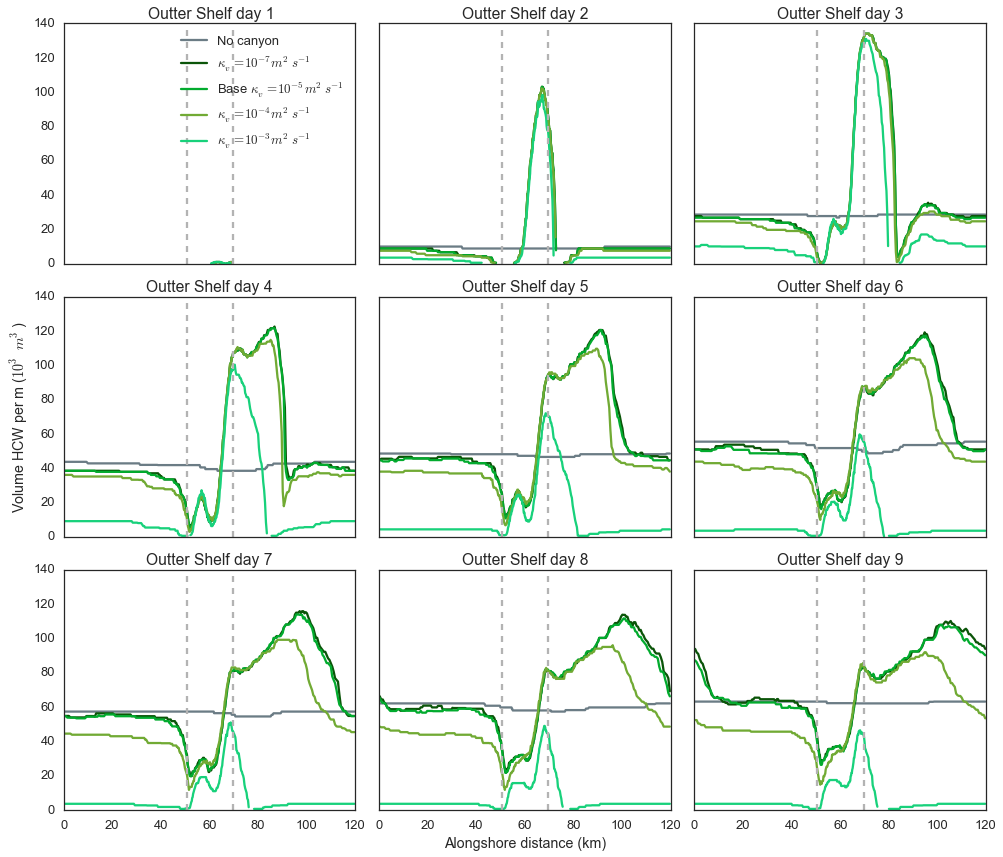

In [64]:
fig,((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9)) = plt.subplots(3,3, figsize = (14,12),sharex=True, sharey=True)

axlist = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9]

times = [2,4,6,8,10,12,14,16,18]
for ii,ax in zip(times,axlist):
    ax.plot(xc[1,:]/1000,HCWNoCout[ii,:]/(1000*dxf[0,:]),sns.xkcd_rgb["battleship grey"],label='No canyon')
    ax.plot(xc[1,:]/1000,HCW17out[ii,:]/(1000*dxf[0,:]),sns.xkcd_rgb["forest"],label='$\kappa_v=10^{-7}m^2s^{-1}$')
    ax.plot(xc[1,:]/1000,HCWout[ii,:]/(1000*dxf[0,:]),sns.xkcd_rgb["kelly green"],label='Base $\kappa_v=10^{-5}m^2s^{-1}$')
    ax.plot(xc[1,:]/1000,HCW11out[ii,:]/(1000*dxf[0,:]),sns.xkcd_rgb["leaf"],label='$\kappa_v=10^{-4}m^2s^{-1}$')
    ax.plot(xc[1,:]/1000,HCW12out[ii,:]/(1000*dxf[0,:]),sns.xkcd_rgb["seaweed"],label='$\kappa_v=10^{-3}m^2s^{-1}$')
    
    
    ax.set_title('Outter Shelf day %d' %(ii/2))
    plotCanyonPos(ax,xc[1,120]/1000,xc[1,240]/1000)

ax1.legend(loc=0)
ax8.set_xlabel('Alongshore distance (km)')
ax4.set_ylabel('Volume HCW per m ($10^3$ $m^3$)')

    
plt.tight_layout()

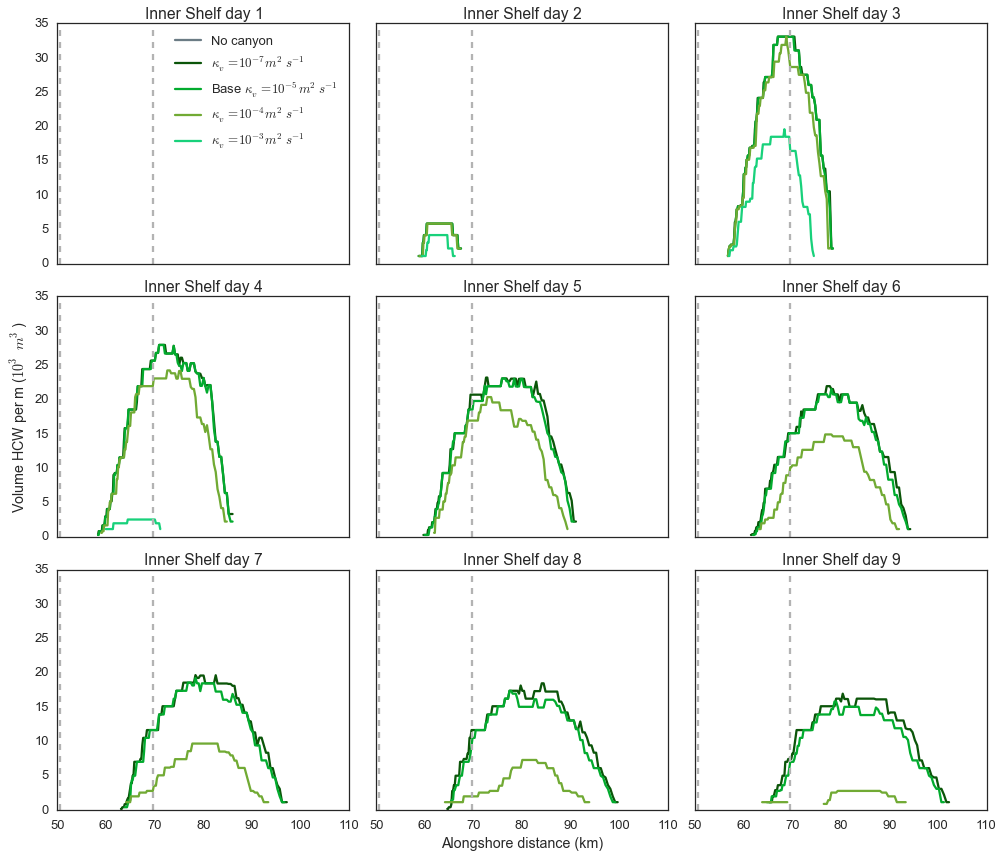

In [65]:
fig,((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9)) = plt.subplots(3,3, figsize = (14,12),sharex=True, sharey=True)

axlist = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9]

times = [2,4,6,8,10,12,14,16,18]
for ii,ax in zip(times,axlist):
    ax.plot(xc[1,:]/1000,HCWNoCin[ii,:]/(1000*dxf[0,:]),sns.xkcd_rgb["battleship grey"],label='No canyon')
    ax.plot(xc[1,:]/1000,HCW17in[ii,:]/(1000*dxf[0,:]),sns.xkcd_rgb["forest"],label='$\kappa_v=10^{-7}m^2s^{-1}$')
    ax.plot(xc[1,:]/1000,HCWin[ii,:]/(1000*dxf[0,:]),sns.xkcd_rgb["kelly green"],label='Base $\kappa_v=10^{-5}m^2s^{-1}$')
    ax.plot(xc[1,:]/1000,HCW11in[ii,:]/(1000*dxf[0,:]),sns.xkcd_rgb["leaf"],label='$\kappa_v=10^{-4}m^2s^{-1}$')
    ax.plot(xc[1,:]/1000,HCW12in[ii,:]/(1000*dxf[0,:]),sns.xkcd_rgb["seaweed"],label='$\kappa_v=10^{-3}m^2s^{-1}$')
    
    
    ax.set_title('Inner Shelf day %d' %(ii/2))
    plotCanyonPos(ax,xc[1,120]/1000,xc[1,240]/1000)

ax1.legend(loc=0)
ax8.set_xlabel('Alongshore distance (km)')
ax4.set_ylabel('Volume HCW per m ($10^3$ $m^3$)')

    
plt.tight_layout()

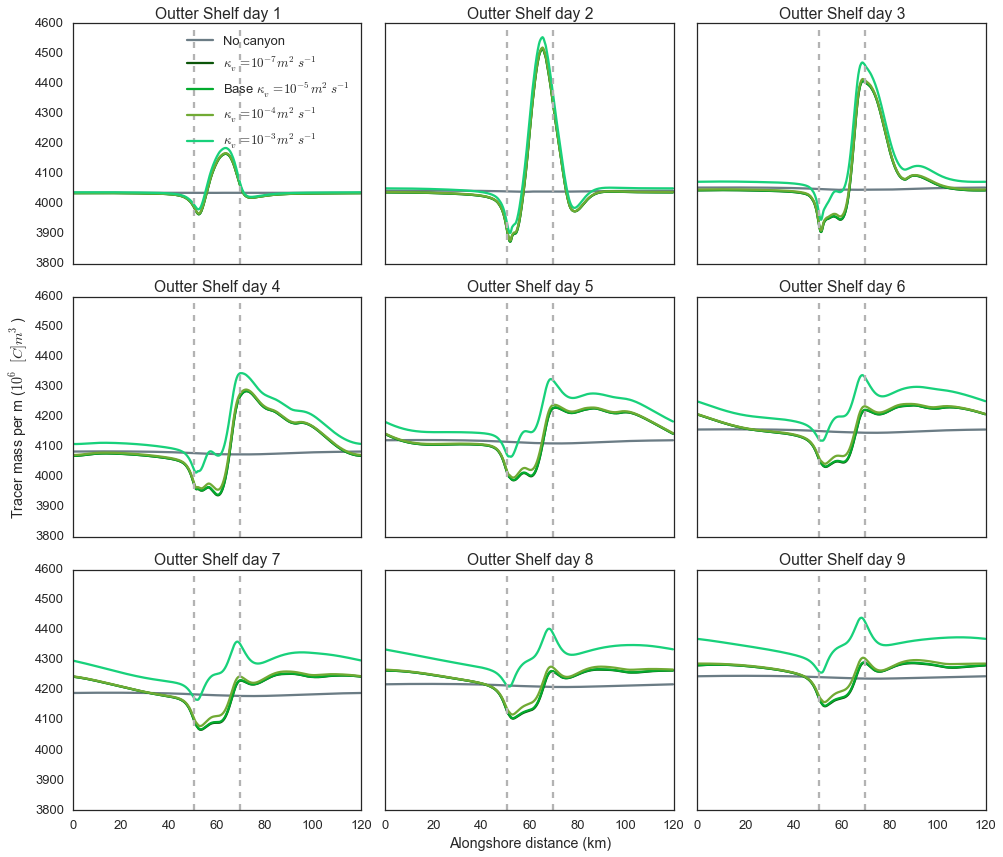

In [66]:
fig,((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9)) = plt.subplots(3,3, figsize = (14,12),sharex=True, sharey=True)

axlist = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9]

times = [2,4,6,8,10,12,14,16,18]
for ii,ax in zip(times,axlist):
    ax.plot(xc[1,:]/1000,TrMassNoCout[ii,:]/(1000000*dxf[0,:]),sns.xkcd_rgb["battleship grey"],label='No canyon')
    ax.plot(xc[1,:]/1000,TrMass17out[ii,:]/(1000000*dxf[0,:]),sns.xkcd_rgb["forest"],label='$\kappa_v=10^{-7}m^2s^{-1}$')
    ax.plot(xc[1,:]/1000,TrMassout[ii,:]/(1000000*dxf[0,:]),sns.xkcd_rgb["kelly green"],label='Base $\kappa_v=10^{-5}m^2s^{-1}$')
    ax.plot(xc[1,:]/1000,TrMass11out[ii,:]/(1000000*dxf[0,:]),sns.xkcd_rgb["leaf"],label='$\kappa_v=10^{-4}m^2s^{-1}$')
    ax.plot(xc[1,:]/1000,TrMass12out[ii,:]/(1000000*dxf[0,:]),sns.xkcd_rgb["seaweed"],label='$\kappa_v=10^{-3}m^2s^{-1}$')
    
    
    ax.set_title('Outter Shelf day %d' %(ii/2))
    plotCanyonPos(ax,xc[1,120]/1000,xc[1,240]/1000)

ax1.legend(loc=0)
ax8.set_xlabel('Alongshore distance (km)')
ax4.set_ylabel('Tracer mass per m ($10^6$ $[C]m^3$)')

plt.tight_layout()    


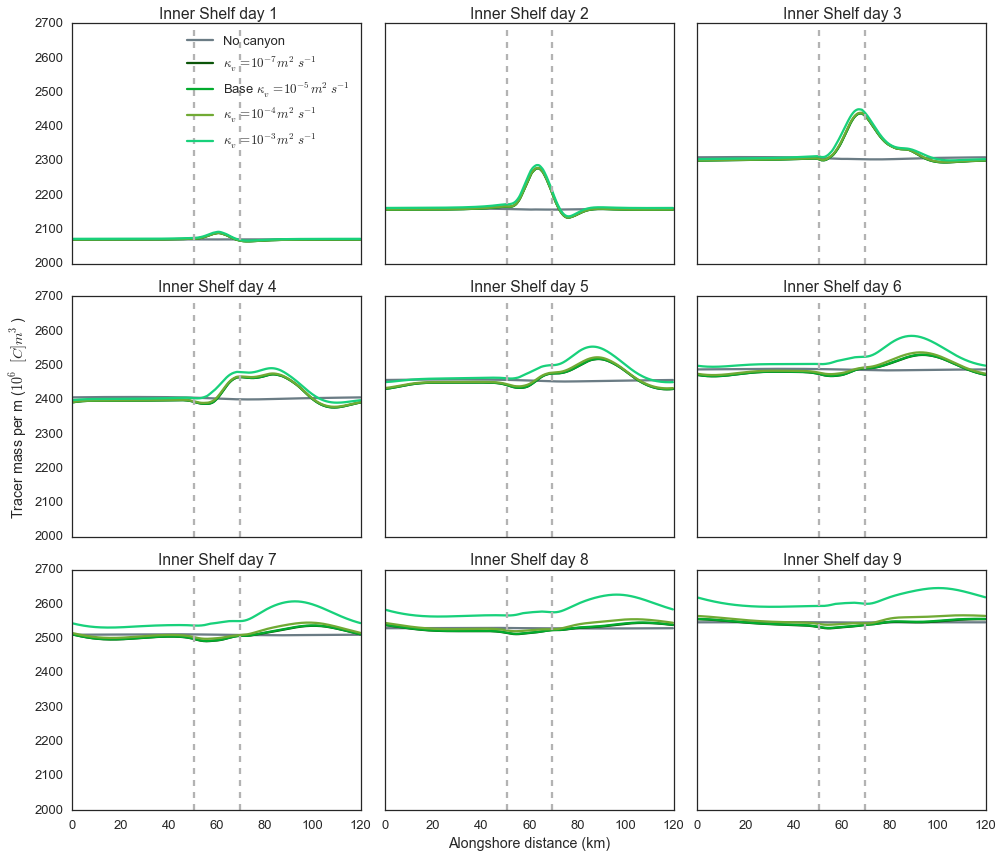

In [67]:
fig,((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9)) = plt.subplots(3,3, figsize = (14,12),sharex=True, sharey=True)

axlist = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9]

times = [2,4,6,8,10,12,14,16,18]
for ii,ax in zip(times,axlist):
    ax.plot(xc[1,:]/1000,TrMassNoCin[ii,:]/(1000000*dxf[0,:]),sns.xkcd_rgb["battleship grey"],label='No canyon')
    ax.plot(xc[1,:]/1000,TrMass17in[ii,:]/(1000000*dxf[0,:]),sns.xkcd_rgb["forest"],label='$\kappa_v=10^{-7}m^2s^{-1}$')
    ax.plot(xc[1,:]/1000,TrMassin[ii,:]/(1000000*dxf[0,:]),sns.xkcd_rgb["kelly green"],label='Base $\kappa_v=10^{-5}m^2s^{-1}$')
    ax.plot(xc[1,:]/1000,TrMass11in[ii,:]/(1000000*dxf[0,:]),sns.xkcd_rgb["leaf"],label='$\kappa_v=10^{-4}m^2s^{-1}$')
    ax.plot(xc[1,:]/1000,TrMass12in[ii,:]/(1000000*dxf[0,:]),sns.xkcd_rgb["seaweed"],label='$\kappa_v=10^{-3}m^2s^{-1}$')
    
    
    ax.set_title('Inner Shelf day %d' %(ii/2))
    plotCanyonPos(ax,xc[1,120]/1000,xc[1,240]/1000)

ax1.legend(loc=0)
ax8.set_xlabel('Alongshore distance (km)')
ax4.set_ylabel('Tracer mass per m ($10^6$ $[C]m^3$)')

plt.tight_layout()    


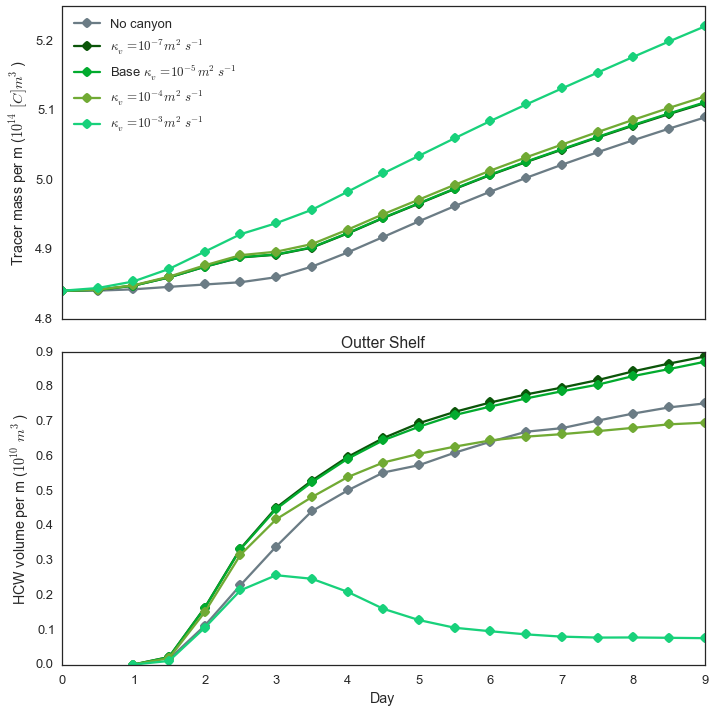

change in HCW from day 5 to day 9 over 4 days ($m^3/s$)
NoC 5.143802e+03
base 5.412003e+03
run11 2.594155e+03
run12 -1.506834e+03
run17 5.554676e+03
change in Tr mass from day 5 to day 9 over 4 days ($m^3/s$)
NoC 4.323880e+07
base 4.197843e+07
run11 4.289851e+07
run12 5.387664e+07
run17 4.183986e+07


In [68]:
fig,(ax1,ax2) = plt.subplots(2,1, figsize = (10,10),sharex=True)

tt = np.arange(19)

ax1.plot(tt/2.,np.sum(TrMassNoCin,axis=1)/1.E14,sns.xkcd_rgb["battleship grey"],marker = 'o',label='No canyon')
ax1.plot(tt/2.,np.sum(TrMass17in,axis=1)/1.E14,sns.xkcd_rgb["forest"],marker = 'o',label='$\kappa_v=10^{-7}m^2s^{-1}$')
ax1.plot(tt/2.,np.sum(TrMassin,axis=1)/1.E14,sns.xkcd_rgb["kelly green"],marker = 'o',label='Base $\kappa_v=10^{-5}m^2s^{-1}$')
ax1.plot(tt/2.,np.sum(TrMass11in,axis=1)/1.E14,sns.xkcd_rgb["leaf"],marker = 'o',label='$\kappa_v=10^{-4}m^2s^{-1}$')
ax1.plot(tt/2.,np.sum(TrMass12in,axis=1)/1.E14,sns.xkcd_rgb["seaweed"],marker = 'o',label='$\kappa_v=10^{-3}m^2s^{-1}$')
   
ax2.plot(tt/2.,np.sum(HCWNoCin,axis=1)/1.E10,sns.xkcd_rgb["battleship grey"],marker = 'o',label='No canyon')
ax2.plot(tt/2.,np.sum(HCW17in,axis=1)/1.E10,sns.xkcd_rgb["forest"],marker = 'o',label='$\kappa_v=10^{-7}m^2s^{-1}$')
ax2.plot(tt/2.,np.sum(HCWin,axis=1)/1.E10,sns.xkcd_rgb["kelly green"],marker = 'o',label='Base $\kappa_v=10^{-5}m^2s^{-1}$')
ax2.plot(tt/2.,np.sum(HCW11in,axis=1)/1.E10,sns.xkcd_rgb["leaf"],marker = 'o',label='$\kappa_v=10^{-4}m^2s^{-1}$')
ax2.plot(tt/2.,np.sum(HCW12in,axis=1)/1.E10,sns.xkcd_rgb["seaweed"],marker = 'o',label='$\kappa_v=10^{-3}m^2s^{-1}$')
  
    
ax1.legend(loc=0)
ax2.set_xlabel('Day')
ax1.set_ylabel('Tracer mass per m ($10^{14}$ $[C]m^3$)')
ax2.set_ylabel('HCW volume per m ($10^{10}$ $m^3$)')
plt.title('Outter Shelf')
plt.tight_layout()

plt.show()



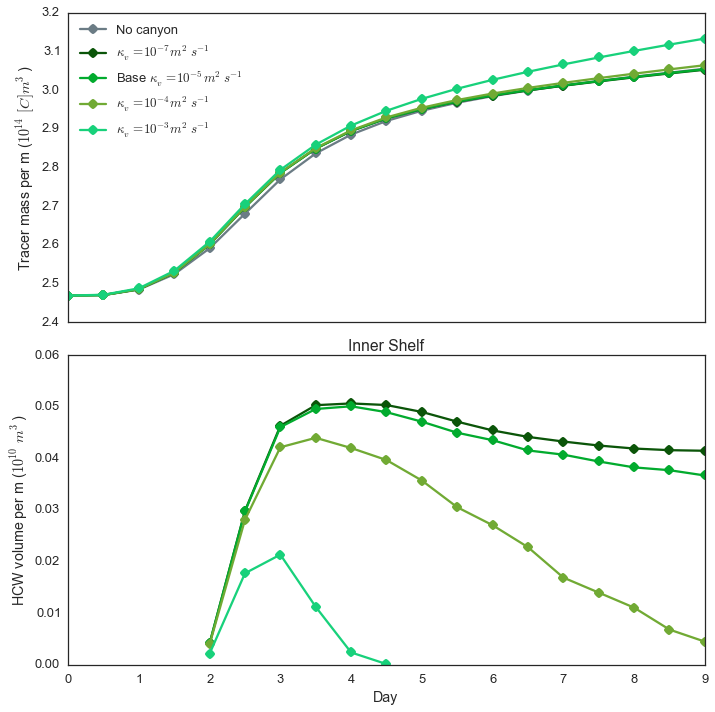

In [69]:
fig,(ax1,ax2) = plt.subplots(2,1, figsize = (10,10),sharex=True)

tt = np.arange(19)

ax1.plot(tt/2.,np.sum(TrMassNoCin,axis=1)/1.E14,sns.xkcd_rgb["battleship grey"],marker = 'o',label='No canyon')
ax1.plot(tt/2.,np.sum(TrMass17in,axis=1)/1.E14,sns.xkcd_rgb["forest"],marker = 'o',label='$\kappa_v=10^{-7}m^2s^{-1}$')
ax1.plot(tt/2.,np.sum(TrMassin,axis=1)/1.E14,sns.xkcd_rgb["kelly green"],marker = 'o',label='Base $\kappa_v=10^{-5}m^2s^{-1}$')
ax1.plot(tt/2.,np.sum(TrMass11in,axis=1)/1.E14,sns.xkcd_rgb["leaf"],marker = 'o',label='$\kappa_v=10^{-4}m^2s^{-1}$')
ax1.plot(tt/2.,np.sum(TrMass12in,axis=1)/1.E14,sns.xkcd_rgb["seaweed"],marker = 'o',label='$\kappa_v=10^{-3}m^2s^{-1}$')
   
ax2.plot(tt/2.,np.sum(HCWNoCin,axis=1)/1.E10,sns.xkcd_rgb["battleship grey"],marker = 'o',label='No canyon')
ax2.plot(tt/2.,np.sum(HCW17in,axis=1)/1.E10,sns.xkcd_rgb["forest"],marker = 'o',label='$\kappa_v=10^{-7}m^2s^{-1}$')
ax2.plot(tt/2.,np.sum(HCWin,axis=1)/1.E10,sns.xkcd_rgb["kelly green"],marker = 'o',label='Base $\kappa_v=10^{-5}m^2s^{-1}$')
ax2.plot(tt/2.,np.sum(HCW11in,axis=1)/1.E10,sns.xkcd_rgb["leaf"],marker = 'o',label='$\kappa_v=10^{-4}m^2s^{-1}$')
ax2.plot(tt/2.,np.sum(HCW12in,axis=1)/1.E10,sns.xkcd_rgb["seaweed"],marker = 'o',label='$\kappa_v=10^{-3}m^2s^{-1}$')
  
    
ax1.legend(loc=0)
ax2.set_xlabel('Day')
ax1.set_ylabel('Tracer mass per m ($10^{14}$ $[C]m^3$)')
ax2.set_ylabel('HCW volume per m ($10^{10}$ $m^3$)')
plt.title('Inner Shelf')
plt.tight_layout()

plt.show()



## Changing geography of diapycnal diffusivity 

In [71]:
Tra = rout.getField(Ptracers043D, 'Tr1')
Trb = rout.getField(Ptracers053D, 'Tr1')
Trc = rout.getField(Ptracers063D, 'Tr1')
Trd = rout.getField(Ptracers073D, 'Tr1')

In [72]:
HCW043Dout,TrMass043Dout = HCW_Tracer_AlongShelf_Split(Tra,mask_NoC,30,rA,hFacC,drF,227,267,30,180,50)
HCW053Dout,TrMass053Dout = HCW_Tracer_AlongShelf_Split(Trb,mask_NoC,30,rA,hFacC,drF,227,267,30,180,50)
HCW063Dout,TrMass063Dout = HCW_Tracer_AlongShelf_Split(Trc,mask_NoC,30,rA,hFacC,drF,227,267,30,180,50)
HCW073Dout,TrMass073Dout = HCW_Tracer_AlongShelf_Split(Trd,mask_NoC,30,rA,hFacC,drF,227,267,30,180,50)

HCW043Din,TrMass043Din = HCW_Tracer_AlongShelf_Split(Tra,mask_NoC,30,rA,hFacC,drF,267,299,30,180,50)
HCW053Din,TrMass053Din = HCW_Tracer_AlongShelf_Split(Trb,mask_NoC,30,rA,hFacC,drF,267,299,30,180,50)
HCW063Din,TrMass063Din = HCW_Tracer_AlongShelf_Split(Trc,mask_NoC,30,rA,hFacC,drF,267,299,30,180,50)
HCW073Din,TrMass073Din = HCW_Tracer_AlongShelf_Split(Trd,mask_NoC,30,rA,hFacC,drF,267,299,30,180,50)

('tracer limit concentration is: ', 7.3974895)
('tracer limit concentration is: ', 7.3974895)
('tracer limit concentration is: ', 7.3974895)
('tracer limit concentration is: ', 7.3974895)
('tracer limit concentration is: ', 7.3974895)
('tracer limit concentration is: ', 7.3974895)
('tracer limit concentration is: ', 7.3974895)
('tracer limit concentration is: ', 7.3974895)


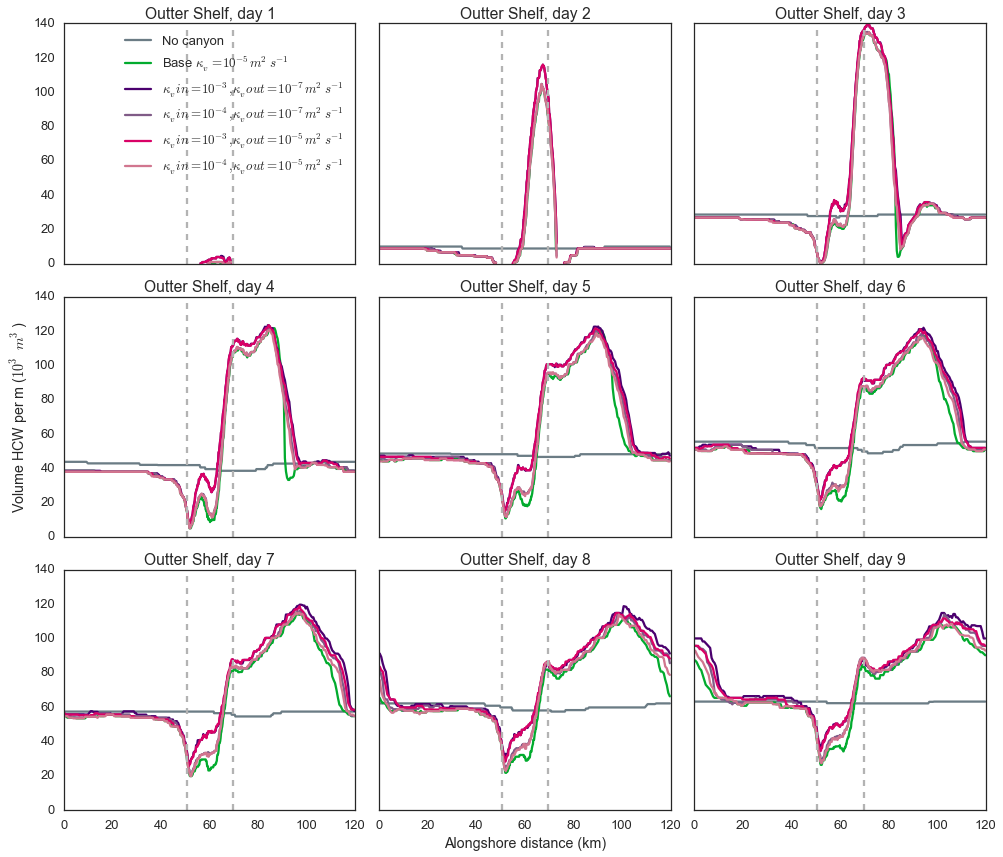

In [73]:
fig,((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9)) = plt.subplots(3,3, figsize = (14,12),sharex=True, sharey=True)

axlist = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9]

times = [2,4,6,8,10,12,14,16,18]
for ii,ax in zip(times,axlist):
    ax.plot(xc[1,:]/1000,HCWNoCout[ii,:]/(1000*dxf[0,:]),sns.xkcd_rgb["battleship grey"],label='No canyon')
    ax.plot(xc[1,:]/1000,HCWout[ii,:]/(1000*dxf[0,:]),sns.xkcd_rgb["kelly green"],label='Base $\kappa_v=10^{-5}m^2s^{-1}$')
    ax.plot(xc[1,:]/1000,HCW043Dout[ii,:]/(1000*dxf[0,:]),sns.xkcd_rgb["royal purple"],label='$\kappa_vin=10^{-3},\kappa_vout=10^{-7}m^2s^{-1}$')
    ax.plot(xc[1,:]/1000,HCW053Dout[ii,:]/(1000*dxf[0,:]),sns.xkcd_rgb["muted purple"],label='$\kappa_vin=10^{-4},\kappa_vout=10^{-7}m^2s^{-1}$')
    ax.plot(xc[1,:]/1000,HCW063Dout[ii,:]/(1000*dxf[0,:]),sns.xkcd_rgb["dark hot pink"],label='$\kappa_vin=10^{-3},\kappa_vout=10^{-5}m^2s^{-1}$')
    ax.plot(xc[1,:]/1000,HCW073Dout[ii,:]/(1000*dxf[0,:]),sns.xkcd_rgb["muted pink"],label='$\kappa_vin=10^{-4},\kappa_vout=10^{-5}m^2s^{-1}$')
    
    
    ax.set_title('Outter Shelf, day %d' %(ii/2))
    plotCanyonPos(ax,xc[1,120]/1000,xc[1,240]/1000)

ax1.legend(loc=0)
ax8.set_xlabel('Alongshore distance (km)')
ax4.set_ylabel('Volume HCW per m ($10^3$ $m^3$)')

plt.tight_layout()    


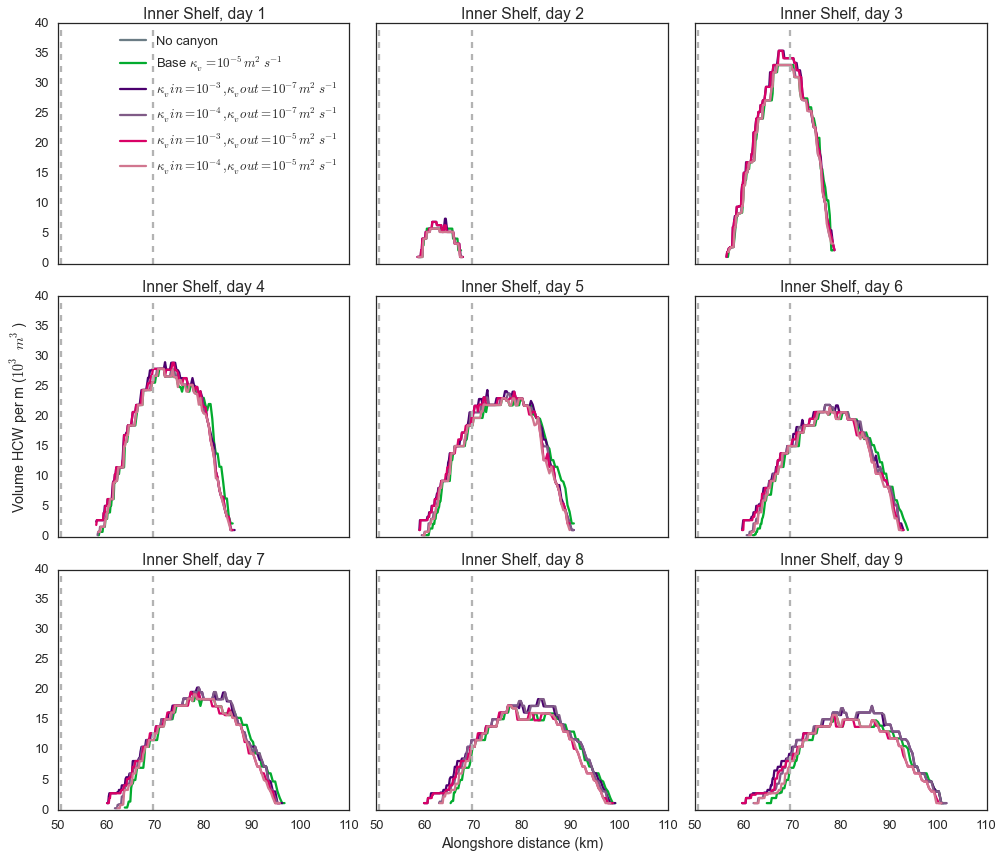

In [74]:
fig,((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9)) = plt.subplots(3,3, figsize = (14,12),sharex=True, sharey=True)

axlist = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9]

times = [2,4,6,8,10,12,14,16,18]
for ii,ax in zip(times,axlist):
    ax.plot(xc[1,:]/1000,HCWNoCin[ii,:]/(1000*dxf[0,:]),sns.xkcd_rgb["battleship grey"],label='No canyon')
    ax.plot(xc[1,:]/1000,HCWin[ii,:]/(1000*dxf[0,:]),sns.xkcd_rgb["kelly green"],label='Base $\kappa_v=10^{-5}m^2s^{-1}$')
    ax.plot(xc[1,:]/1000,HCW043Din[ii,:]/(1000*dxf[0,:]),sns.xkcd_rgb["royal purple"],label='$\kappa_vin=10^{-3},\kappa_vout=10^{-7}m^2s^{-1}$')
    ax.plot(xc[1,:]/1000,HCW053Din[ii,:]/(1000*dxf[0,:]),sns.xkcd_rgb["muted purple"],label='$\kappa_vin=10^{-4},\kappa_vout=10^{-7}m^2s^{-1}$')
    ax.plot(xc[1,:]/1000,HCW063Din[ii,:]/(1000*dxf[0,:]),sns.xkcd_rgb["dark hot pink"],label='$\kappa_vin=10^{-3},\kappa_vout=10^{-5}m^2s^{-1}$')
    ax.plot(xc[1,:]/1000,HCW073Din[ii,:]/(1000*dxf[0,:]),sns.xkcd_rgb["muted pink"],label='$\kappa_vin=10^{-4},\kappa_vout=10^{-5}m^2s^{-1}$')
    
    
    ax.set_title('Inner Shelf, day %d' %(ii/2))
    plotCanyonPos(ax,xc[1,120]/1000,xc[1,240]/1000)

ax1.legend(loc=0)
ax8.set_xlabel('Alongshore distance (km)')
ax4.set_ylabel('Volume HCW per m ($10^3$ $m^3$)')

plt.tight_layout()    


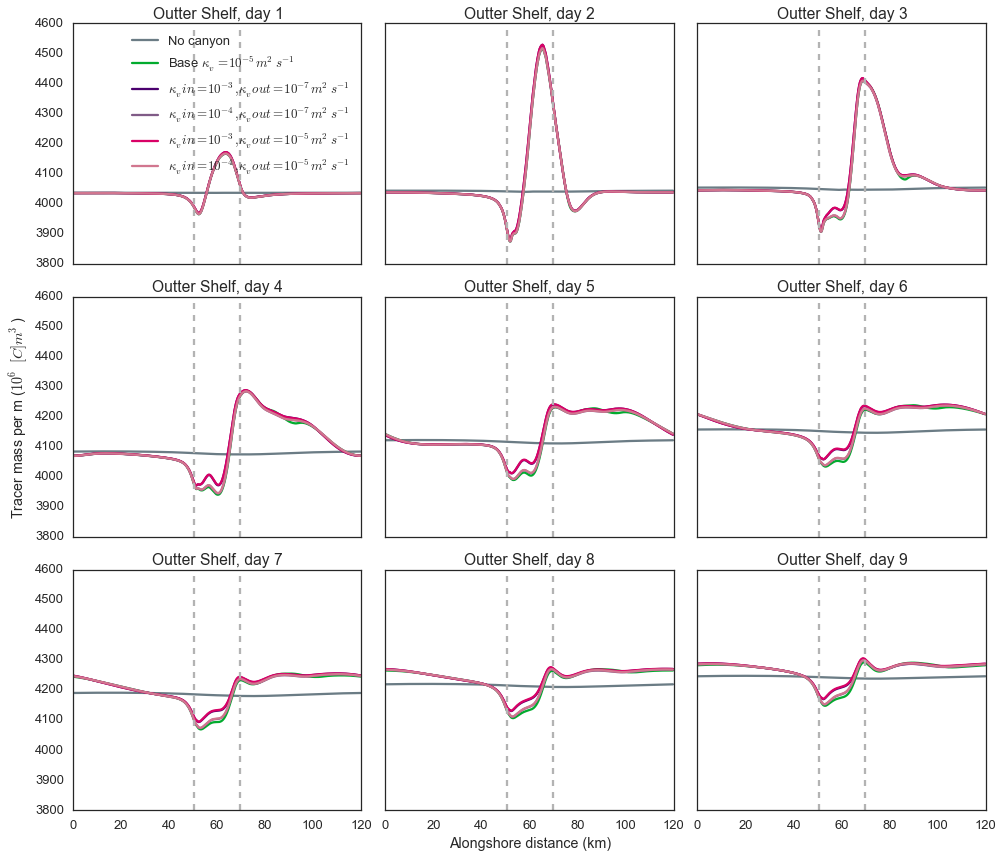

In [75]:
fig,((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9)) = plt.subplots(3,3, figsize = (14,12),sharex=True, sharey=True)

axlist = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9]

times = [2,4,6,8,10,12,14,16,18]
for ii,ax in zip(times,axlist):
    ax.plot(xc[1,:]/1000,TrMassNoCout[ii,:]/(1000000*dxf[0,:]),sns.xkcd_rgb["battleship grey"],label='No canyon')
    ax.plot(xc[1,:]/1000,TrMassout[ii,:]/(1000000*dxf[0,:]),sns.xkcd_rgb["kelly green"],label='Base $\kappa_v=10^{-5}m^2s^{-1}$')
    ax.plot(xc[1,:]/1000,TrMass043Dout[ii,:]/(1000000*dxf[0,:]),sns.xkcd_rgb["royal purple"],label='$\kappa_vin=10^{-3},\kappa_vout=10^{-7}m^2s^{-1}$')
    ax.plot(xc[1,:]/1000,TrMass053Dout[ii,:]/(1000000*dxf[0,:]),sns.xkcd_rgb["muted purple"],label='$\kappa_vin=10^{-4},\kappa_vout=10^{-7}m^2s^{-1}$')
    ax.plot(xc[1,:]/1000,TrMass063Dout[ii,:]/(1000000*dxf[0,:]),sns.xkcd_rgb["dark hot pink"],label='$\kappa_vin=10^{-3},\kappa_vout=10^{-5}m^2s^{-1}$')
    ax.plot(xc[1,:]/1000,TrMass073Dout[ii,:]/(1000000*dxf[0,:]),sns.xkcd_rgb["muted pink"],label='$\kappa_vin=10^{-4},\kappa_vout=10^{-5}m^2s^{-1}$')
    
    
    ax.set_title('Outter Shelf, day %d' %(ii/2))
    plotCanyonPos(ax,xc[1,120]/1000,xc[1,240]/1000)

ax1.legend(loc=0)
ax8.set_xlabel('Alongshore distance (km)')
ax4.set_ylabel('Tracer mass per m ($10^6$ $[C]m^3$)')

    
plt.tight_layout()

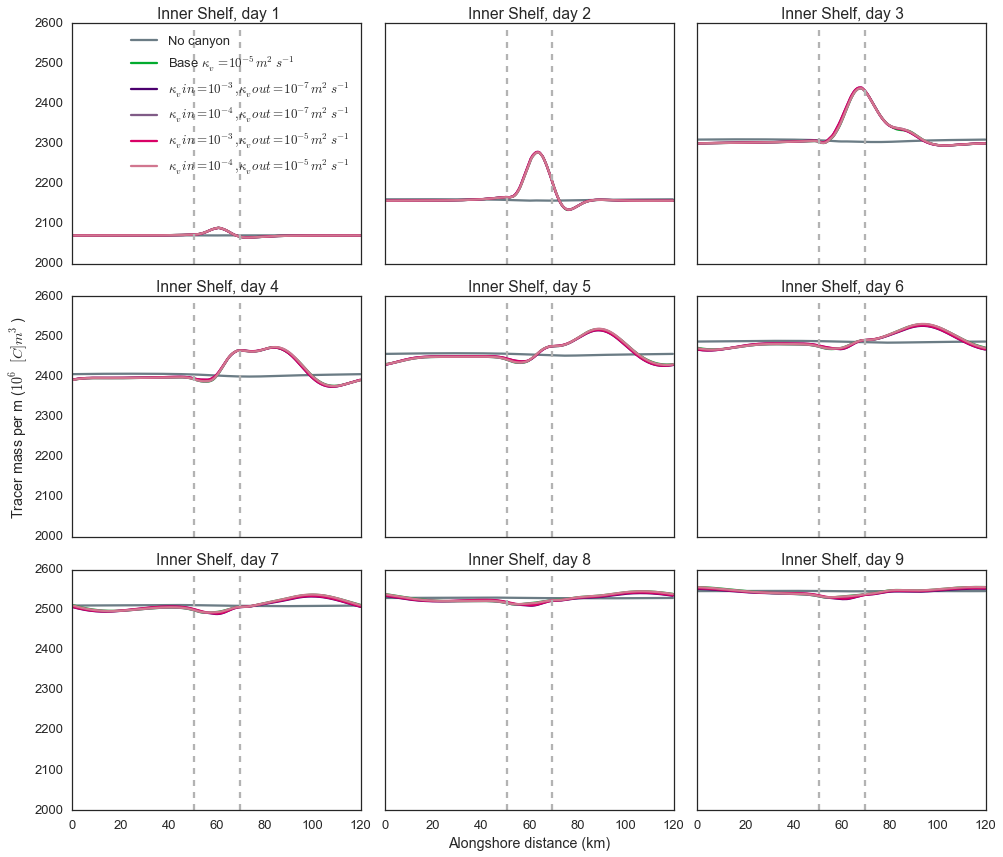

In [76]:
fig,((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9)) = plt.subplots(3,3, figsize = (14,12),sharex=True, sharey=True)

axlist = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9]

times = [2,4,6,8,10,12,14,16,18]
for ii,ax in zip(times,axlist):
    ax.plot(xc[1,:]/1000,TrMassNoCin[ii,:]/(1000000*dxf[0,:]),sns.xkcd_rgb["battleship grey"],label='No canyon')
    ax.plot(xc[1,:]/1000,TrMassin[ii,:]/(1000000*dxf[0,:]),sns.xkcd_rgb["kelly green"],label='Base $\kappa_v=10^{-5}m^2s^{-1}$')
    ax.plot(xc[1,:]/1000,TrMass043Din[ii,:]/(1000000*dxf[0,:]),sns.xkcd_rgb["royal purple"],label='$\kappa_vin=10^{-3},\kappa_vout=10^{-7}m^2s^{-1}$')
    ax.plot(xc[1,:]/1000,TrMass053Din[ii,:]/(1000000*dxf[0,:]),sns.xkcd_rgb["muted purple"],label='$\kappa_vin=10^{-4},\kappa_vout=10^{-7}m^2s^{-1}$')
    ax.plot(xc[1,:]/1000,TrMass063Din[ii,:]/(1000000*dxf[0,:]),sns.xkcd_rgb["dark hot pink"],label='$\kappa_vin=10^{-3},\kappa_vout=10^{-5}m^2s^{-1}$')
    ax.plot(xc[1,:]/1000,TrMass073Din[ii,:]/(1000000*dxf[0,:]),sns.xkcd_rgb["muted pink"],label='$\kappa_vin=10^{-4},\kappa_vout=10^{-5}m^2s^{-1}$')
    
    
    ax.set_title('Inner Shelf, day %d' %(ii/2))
    plotCanyonPos(ax,xc[1,120]/1000,xc[1,240]/1000)

ax1.legend(loc=0)
ax8.set_xlabel('Alongshore distance (km)')
ax4.set_ylabel('Tracer mass per m ($10^6$ $[C]m^3$)')

    
plt.tight_layout()

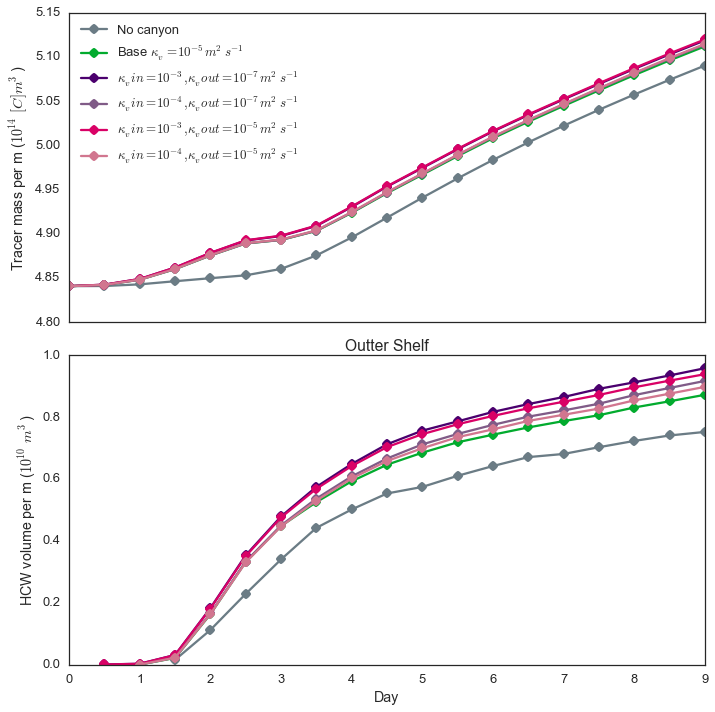

In [77]:
fig,(ax1,ax2) = plt.subplots(2,1, figsize = (10,10),sharex=True)

tt = np.arange(19)

ax1.plot(tt/2.,np.sum(TrMassNoCin,axis=1)/1.E14,sns.xkcd_rgb["battleship grey"],marker = 'o',label='No canyon')
ax1.plot(tt/2.,np.sum(TrMassin,axis=1)/1.E14,sns.xkcd_rgb["kelly green"],marker = 'o',label='Base $\kappa_v=10^{-5}m^2s^{-1}$')
ax1.plot(tt/2.,np.sum(TrMass043Din,axis=1)/1.E14,sns.xkcd_rgb["royal purple"],marker = 'o',label='$\kappa_vin=10^{-3},\kappa_vout=10^{-7}m^2s^{-1}$')
ax1.plot(tt/2.,np.sum(TrMass053Din,axis=1)/1.E14,sns.xkcd_rgb["muted purple"],marker = 'o',label='$\kappa_vin=10^{-4},\kappa_vout=10^{-7}m^2s^{-1}$')
ax1.plot(tt/2.,np.sum(TrMass063Din,axis=1)/1.E14,sns.xkcd_rgb["dark hot pink"],marker = 'o',label='$\kappa_vin=10^{-3},\kappa_vout=10^{-5}m^2s^{-1}$')
ax1.plot(tt/2.,np.sum(TrMass073Din,axis=1)/1.E14,sns.xkcd_rgb["muted pink"],marker = 'o',label='$\kappa_vin=10^{-4},\kappa_vout=10^{-5}m^2s^{-1}$')
   
ax2.plot(tt/2.,np.sum(HCWNoCin,axis=1)/1.E10,sns.xkcd_rgb["battleship grey"],marker = 'o',label='No canyon')
ax2.plot(tt/2.,np.sum(HCWin,axis=1)/1.E10,sns.xkcd_rgb["kelly green"],marker = 'o',label='Base $\kappa_v=10^{-5}m^2s^{-1}$')
ax2.plot(tt/2.,np.sum(HCW043Din,axis=1)/1.E10,sns.xkcd_rgb["royal purple"],marker = 'o',label='$\kappa_vin=10^{-3},\kappa_vout=10^{-7}m^2s^{-1}$')
ax2.plot(tt/2.,np.sum(HCW053Din,axis=1)/1.E10,sns.xkcd_rgb["muted purple"],marker = 'o',label='$\kappa_vin=10^{-4},\kappa_vout=10^{-7}m^2s^{-1}$')
ax2.plot(tt/2.,np.sum(HCW063Din,axis=1)/1.E10,sns.xkcd_rgb["dark hot pink"],marker = 'o',label='$\kappa_vin=10^{-3},\kappa_vout=10^{-5}m^2s^{-1}$')
ax2.plot(tt/2.,np.sum(HCW073Din,axis=1)/1.E10,sns.xkcd_rgb["muted pink"],marker = 'o',label='$\kappa_vin=10^{-4},\kappa_vout=10^{-5}m^2s^{-1}$')
  
    
ax1.legend(loc=0)
ax2.set_xlabel('Day')
ax1.set_ylabel('Tracer mass per m ($10^{14}$ $[C]m^3$)')
ax2.set_ylabel('HCW volume per m ($10^{10}$ $m^3$)')
plt.title('Outter Shelf')
plt.tight_layout()

plt.show()



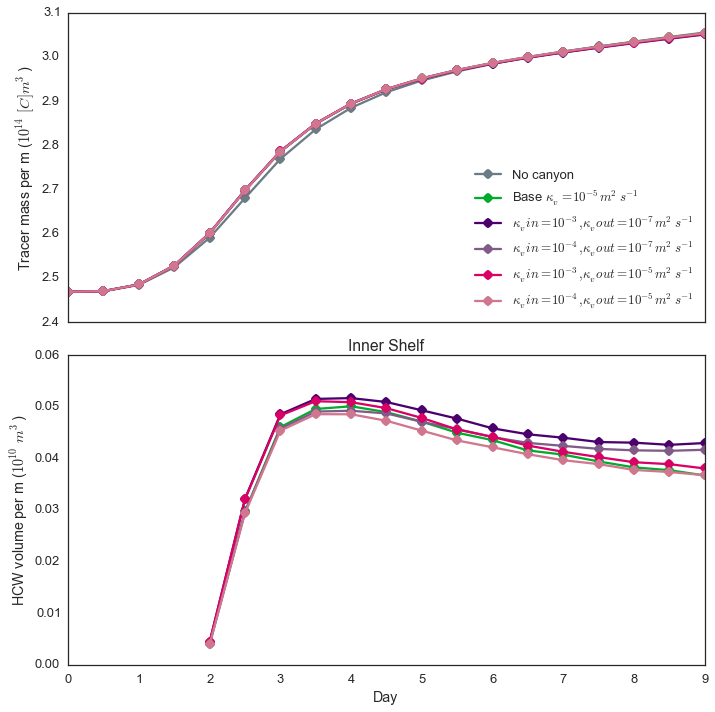

In [78]:
fig,(ax1,ax2) = plt.subplots(2,1, figsize = (10,10),sharex=True)

tt = np.arange(19)

ax1.plot(tt/2.,np.sum(TrMassNoCin,axis=1)/1.E14,sns.xkcd_rgb["battleship grey"],marker = 'o',label='No canyon')
ax1.plot(tt/2.,np.sum(TrMassin,axis=1)/1.E14,sns.xkcd_rgb["kelly green"],marker = 'o',label='Base $\kappa_v=10^{-5}m^2s^{-1}$')
ax1.plot(tt/2.,np.sum(TrMass043Din,axis=1)/1.E14,sns.xkcd_rgb["royal purple"],marker = 'o',label='$\kappa_vin=10^{-3},\kappa_vout=10^{-7}m^2s^{-1}$')
ax1.plot(tt/2.,np.sum(TrMass053Din,axis=1)/1.E14,sns.xkcd_rgb["muted purple"],marker = 'o',label='$\kappa_vin=10^{-4},\kappa_vout=10^{-7}m^2s^{-1}$')
ax1.plot(tt/2.,np.sum(TrMass063Din,axis=1)/1.E14,sns.xkcd_rgb["dark hot pink"],marker = 'o',label='$\kappa_vin=10^{-3},\kappa_vout=10^{-5}m^2s^{-1}$')
ax1.plot(tt/2.,np.sum(TrMass073Din,axis=1)/1.E14,sns.xkcd_rgb["muted pink"],marker = 'o',label='$\kappa_vin=10^{-4},\kappa_vout=10^{-5}m^2s^{-1}$')
   
ax2.plot(tt/2.,np.sum(HCWNoCin,axis=1)/1.E10,sns.xkcd_rgb["battleship grey"],marker = 'o',label='No canyon')
ax2.plot(tt/2.,np.sum(HCWin,axis=1)/1.E10,sns.xkcd_rgb["kelly green"],marker = 'o',label='Base $\kappa_v=10^{-5}m^2s^{-1}$')
ax2.plot(tt/2.,np.sum(HCW043Din,axis=1)/1.E10,sns.xkcd_rgb["royal purple"],marker = 'o',label='$\kappa_vin=10^{-3},\kappa_vout=10^{-7}m^2s^{-1}$')
ax2.plot(tt/2.,np.sum(HCW053Din,axis=1)/1.E10,sns.xkcd_rgb["muted purple"],marker = 'o',label='$\kappa_vin=10^{-4},\kappa_vout=10^{-7}m^2s^{-1}$')
ax2.plot(tt/2.,np.sum(HCW063Din,axis=1)/1.E10,sns.xkcd_rgb["dark hot pink"],marker = 'o',label='$\kappa_vin=10^{-3},\kappa_vout=10^{-5}m^2s^{-1}$')
ax2.plot(tt/2.,np.sum(HCW073Din,axis=1)/1.E10,sns.xkcd_rgb["muted pink"],marker = 'o',label='$\kappa_vin=10^{-4},\kappa_vout=10^{-5}m^2s^{-1}$')
  
    
ax1.legend(loc=0)
ax2.set_xlabel('Day')
ax1.set_ylabel('Tracer mass per m ($10^{14}$ $[C]m^3$)')
ax2.set_ylabel('HCW volume per m ($10^{10}$ $m^3$)')
plt.title('Inner Shelf')
plt.tight_layout()

plt.show()


## Changing initial stratification

In [79]:
Tra = rout.getField(Ptracers14, 'Tr1')
Trb = rout.getField(Ptracers15, 'Tr1')
Trc = rout.getField(Ptracers16, 'Tr1')


In [80]:
HCW14out,TrMass14out = HCW_Tracer_AlongShelf_Split(Tra,mask_NoC,30,rA,hFacC,drF,227,267,30,180,50)
HCW15out,TrMass15out = HCW_Tracer_AlongShelf_Split(Trb,mask_NoC,30,rA,hFacC,drF,227,267,30,180,50)
HCW16out,TrMass16out = HCW_Tracer_AlongShelf_Split(Trc,mask_NoC,30,rA,hFacC,drF,227,267,30,180,50)

HCW14in,TrMass14in = HCW_Tracer_AlongShelf_Split(Tra,mask_NoC,30,rA,hFacC,drF,267,299,30,180,50)
HCW15in,TrMass15in = HCW_Tracer_AlongShelf_Split(Trb,mask_NoC,30,rA,hFacC,drF,267,299,30,180,50)
HCW16in,TrMass16in = HCW_Tracer_AlongShelf_Split(Trc,mask_NoC,30,rA,hFacC,drF,267,299,30,180,50)


('tracer limit concentration is: ', 7.3974895)
('tracer limit concentration is: ', 7.3974895)
('tracer limit concentration is: ', 7.3974895)
('tracer limit concentration is: ', 7.3974895)
('tracer limit concentration is: ', 7.3974895)
('tracer limit concentration is: ', 7.3974895)


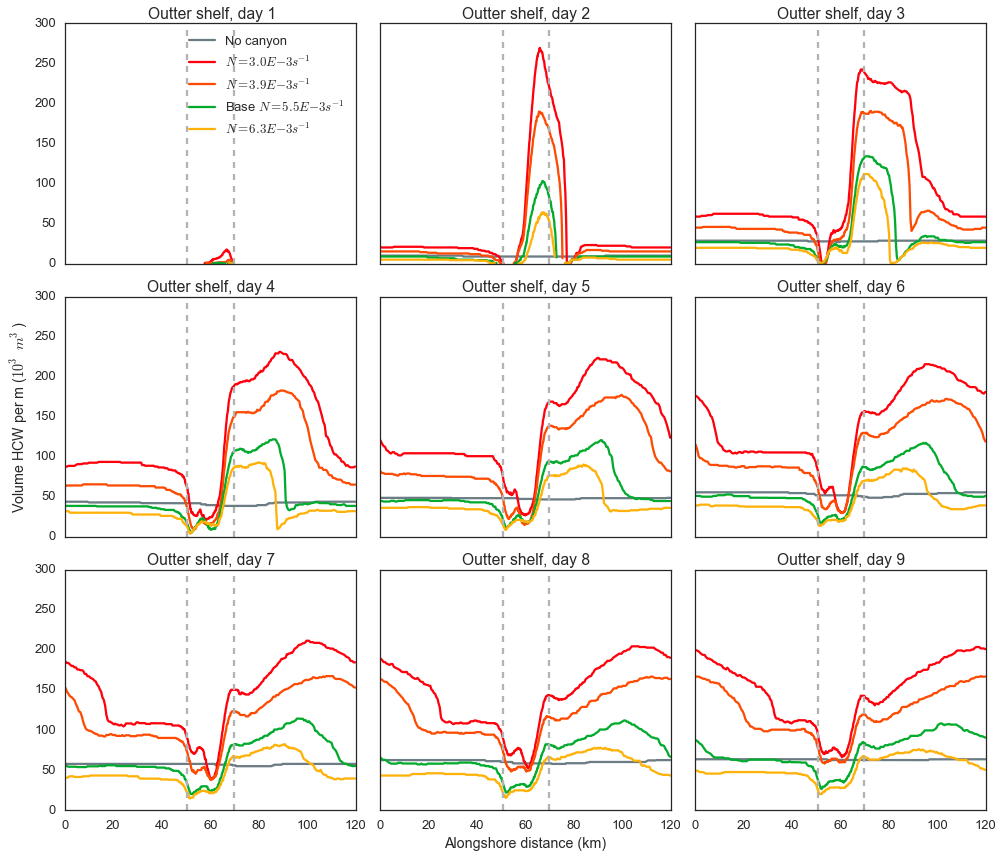

In [81]:
fig,((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9)) = plt.subplots(3,3, figsize = (14,12),sharex=True, sharey=True)

axlist = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9]

times = [2,4,6,8,10,12,14,16,18]
for ii,ax in zip(times,axlist):
    
    ax.plot(xc[1,:]/1000,HCWNoCout[ii,:]/(1000*dxf[0,:]),sns.xkcd_rgb["battleship grey"],label='No canyon')
    ax.plot(xc[1,:]/1000,HCW16out[ii,:]/(1000*dxf[0,:]),sns.xkcd_rgb["bright red"],label='$N=3.0E-3s^{-1}$')
    ax.plot(xc[1,:]/1000,HCW14out[ii,:]/(1000*dxf[0,:]),sns.xkcd_rgb["blood orange"],label='$N=3.9E-3s^{-1}$')
    ax.plot(xc[1,:]/1000,HCWout[ii,:]/(1000*dxf[0,:]),sns.xkcd_rgb["kelly green"],label='Base $N=5.5E-3s^{-1}$')
    ax.plot(xc[1,:]/1000,HCW15out[ii,:]/(1000*dxf[0,:]),sns.xkcd_rgb["saffron"],label='$N=6.3E-3s^{-1}$')
    
    
    ax.set_title('Outter shelf, day %d' %(ii/2))
    plotCanyonPos(ax,xc[1,120]/1000,xc[1,240]/1000)

ax1.legend(loc=0)
ax8.set_xlabel('Alongshore distance (km)')
ax4.set_ylabel('Volume HCW per m ($10^3$ $m^3$)')
plt.tight_layout()


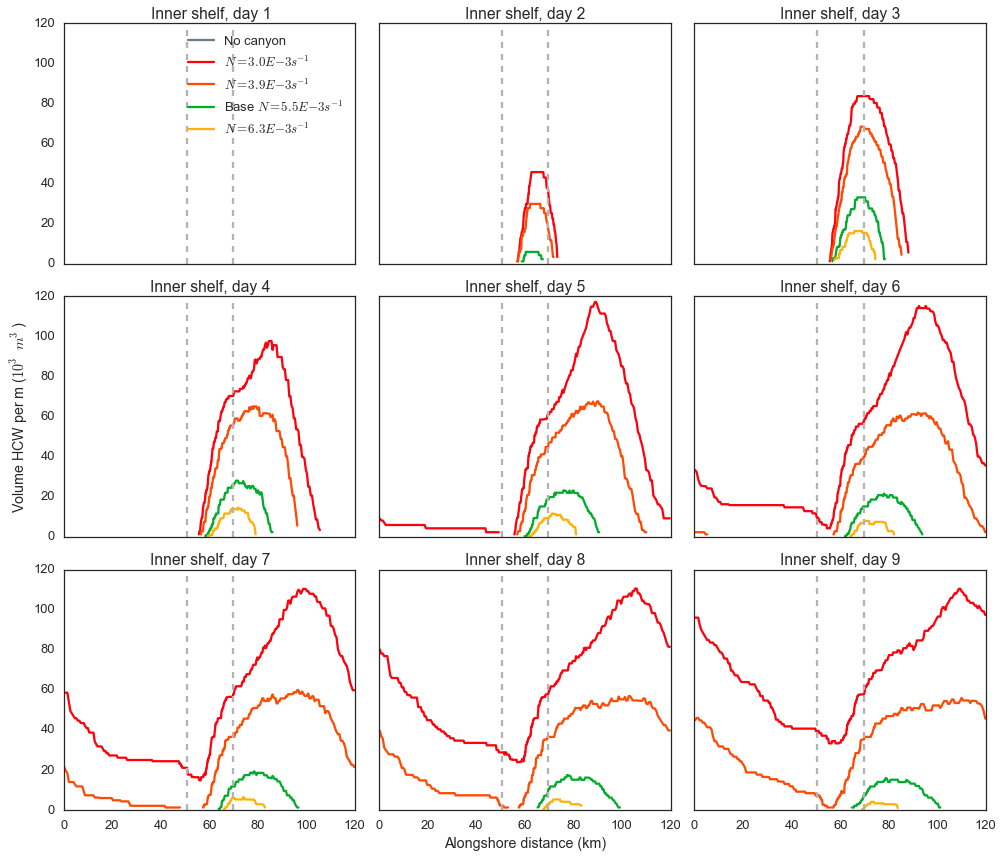

In [82]:
fig,((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9)) = plt.subplots(3,3, figsize = (14,12),sharex=True, sharey=True)

axlist = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9]

times = [2,4,6,8,10,12,14,16,18]
for ii,ax in zip(times,axlist):
    
    ax.plot(xc[1,:]/1000,HCWNoCin[ii,:]/(1000*dxf[0,:]),sns.xkcd_rgb["battleship grey"],label='No canyon')
    ax.plot(xc[1,:]/1000,HCW16in[ii,:]/(1000*dxf[0,:]),sns.xkcd_rgb["bright red"],label='$N=3.0E-3s^{-1}$')
    ax.plot(xc[1,:]/1000,HCW14in[ii,:]/(1000*dxf[0,:]),sns.xkcd_rgb["blood orange"],label='$N=3.9E-3s^{-1}$')
    ax.plot(xc[1,:]/1000,HCWin[ii,:]/(1000*dxf[0,:]),sns.xkcd_rgb["kelly green"],label='Base $N=5.5E-3s^{-1}$')
    ax.plot(xc[1,:]/1000,HCW15in[ii,:]/(1000*dxf[0,:]),sns.xkcd_rgb["saffron"],label='$N=6.3E-3s^{-1}$')
    
    
    ax.set_title('Inner shelf, day %d' %(ii/2))
    plotCanyonPos(ax,xc[1,120]/1000,xc[1,240]/1000)

ax1.legend(loc=0)
ax8.set_xlabel('Alongshore distance (km)')
ax4.set_ylabel('Volume HCW per m ($10^3$ $m^3$)')
plt.tight_layout()


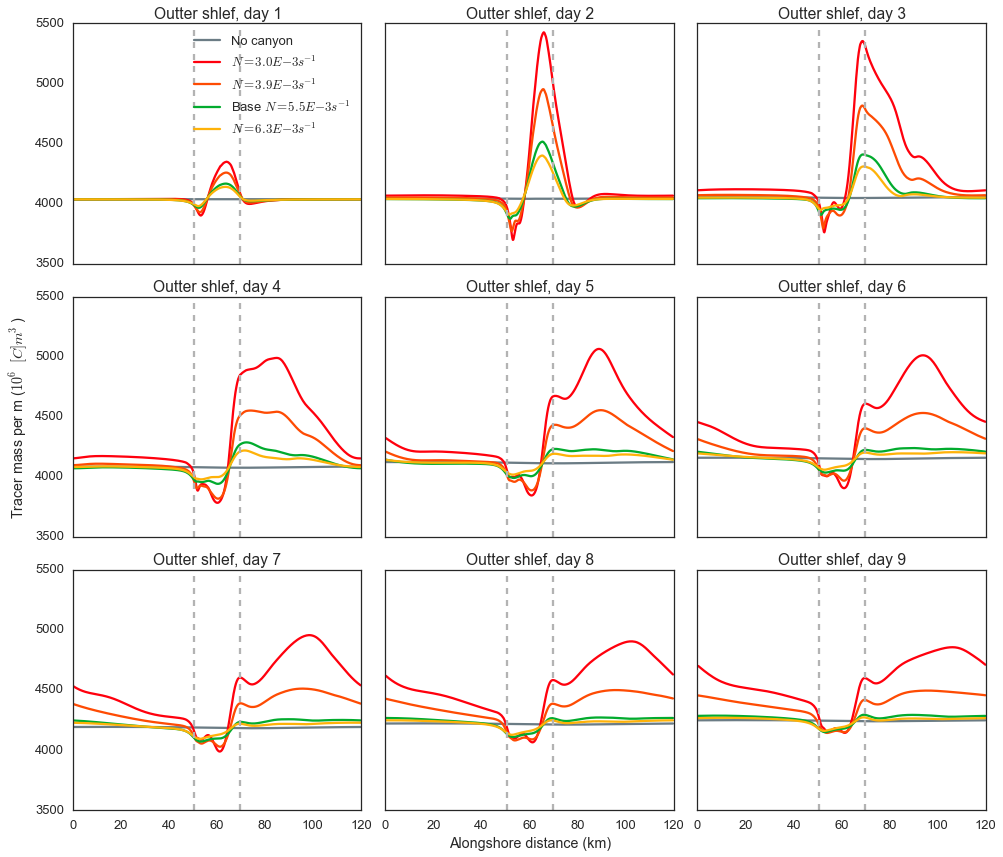

In [83]:
fig,((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9)) = plt.subplots(3,3, figsize = (14,12),sharex=True, sharey=True)

axlist = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9]

times = [2,4,6,8,10,12,14,16,18]
for ii,ax in zip(times,axlist):
    ax.plot(xc[1,:]/1000,TrMassNoCout[ii,:]/(1000000*dxf[0,:]),sns.xkcd_rgb["battleship grey"],label='No canyon')
    ax.plot(xc[1,:]/1000,TrMass16out[ii,:]/(1000000*dxf[0,:]),sns.xkcd_rgb["bright red"],label='$N=3.0E-3s^{-1}$')
    ax.plot(xc[1,:]/1000,TrMass14out[ii,:]/(1000000*dxf[0,:]),sns.xkcd_rgb["blood orange"],label='$N=3.9E-3s^{-1}$')
    ax.plot(xc[1,:]/1000,TrMassout[ii,:]/(1000000*dxf[0,:]),sns.xkcd_rgb["kelly green"],label='Base $N=5.5E-3s^{-1}$')
    ax.plot(xc[1,:]/1000,TrMass15out[ii,:]/(1000000*dxf[0,:]),sns.xkcd_rgb["saffron"],label='$N=6.3E-3s^{-1}$')
   
    
    ax.set_title('Outter shlef, day %d' %(ii/2))
    plotCanyonPos(ax,xc[1,120]/1000,xc[1,240]/1000)

ax1.legend(loc=0)
ax8.set_xlabel('Alongshore distance (km)')
ax4.set_ylabel('Tracer mass per m ($10^6$ $[C]m^3$)')

plt.tight_layout()

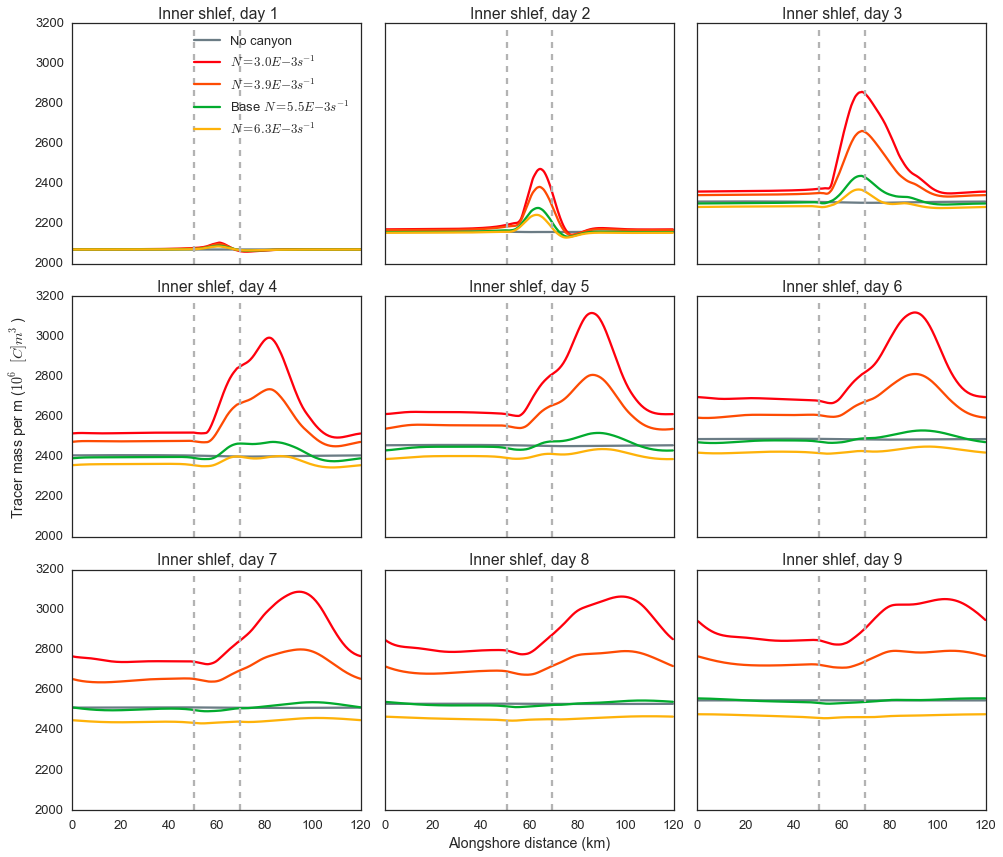

In [84]:
fig,((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9)) = plt.subplots(3,3, figsize = (14,12),sharex=True, sharey=True)

axlist = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9]

times = [2,4,6,8,10,12,14,16,18]
for ii,ax in zip(times,axlist):
    ax.plot(xc[1,:]/1000,TrMassNoCin[ii,:]/(1000000*dxf[0,:]),sns.xkcd_rgb["battleship grey"],label='No canyon')
    ax.plot(xc[1,:]/1000,TrMass16in[ii,:]/(1000000*dxf[0,:]),sns.xkcd_rgb["bright red"],label='$N=3.0E-3s^{-1}$')
    ax.plot(xc[1,:]/1000,TrMass14in[ii,:]/(1000000*dxf[0,:]),sns.xkcd_rgb["blood orange"],label='$N=3.9E-3s^{-1}$')
    ax.plot(xc[1,:]/1000,TrMassin[ii,:]/(1000000*dxf[0,:]),sns.xkcd_rgb["kelly green"],label='Base $N=5.5E-3s^{-1}$')
    ax.plot(xc[1,:]/1000,TrMass15in[ii,:]/(1000000*dxf[0,:]),sns.xkcd_rgb["saffron"],label='$N=6.3E-3s^{-1}$')
   
    
    ax.set_title('Inner shlef, day %d' %(ii/2))
    plotCanyonPos(ax,xc[1,120]/1000,xc[1,240]/1000)

ax1.legend(loc=0)
ax8.set_xlabel('Alongshore distance (km)')
ax4.set_ylabel('Tracer mass per m ($10^6$ $[C]m^3$)')

plt.tight_layout()

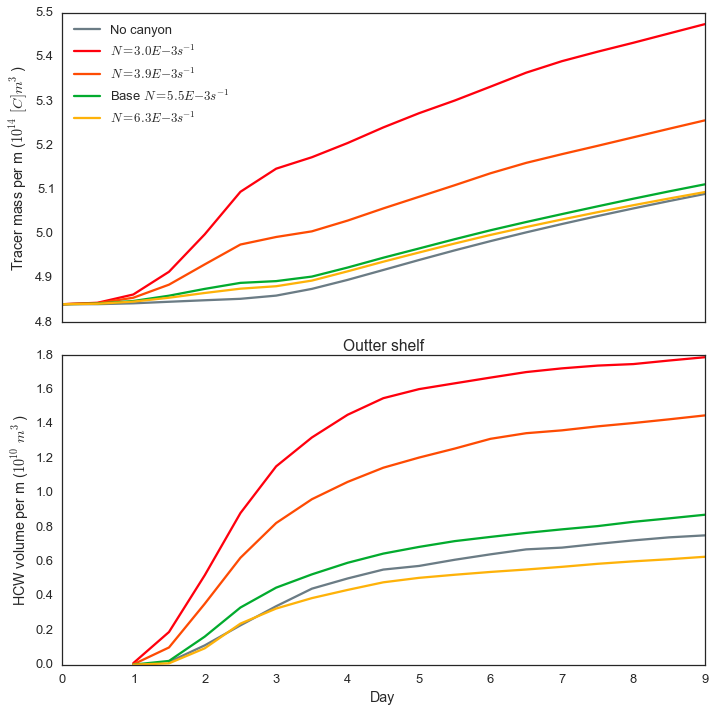

In [85]:
fig,(ax1,ax2) = plt.subplots(2,1, figsize = (10,10),sharex=True)

tt = np.arange(19)

ax1.plot(tt/2.,np.sum(TrMassNoCin,axis=1)/1.E14,sns.xkcd_rgb["battleship grey"],label='No canyon')
ax1.plot(tt/2.,np.sum(TrMass16in,axis=1)/1.E14,sns.xkcd_rgb["bright red"],label='$N=3.0E-3s^{-1}$')
ax1.plot(tt/2.,np.sum(TrMass14in,axis=1)/1.E14,sns.xkcd_rgb["blood orange"],label='$N=3.9E-3s^{-1}$')
ax1.plot(tt/2.,np.sum(TrMassin,axis=1)/1.E14,sns.xkcd_rgb["kelly green"],label='Base $N=5.5E-3s^{-1}$')
ax1.plot(tt/2.,np.sum(TrMass15in,axis=1)/1.E14,sns.xkcd_rgb["saffron"],label='$N=6.3E-3s^{-1}$')
   
ax2.plot(tt/2.,np.sum(HCWNoCin,axis=1)/1.E10,sns.xkcd_rgb["battleship grey"],label='No canyon')
ax2.plot(tt/2.,np.sum(HCW16in,axis=1)/1.E10,sns.xkcd_rgb["bright red"],label='$N=3.0E-3s^{-1}$')
ax2.plot(tt/2.,np.sum(HCW14in,axis=1)/1.E10,sns.xkcd_rgb["blood orange"],label='$N=3.9E-3s^{-1}$')
ax2.plot(tt/2.,np.sum(HCWin,axis=1)/1.E10,sns.xkcd_rgb["kelly green"],label='Base $N=5.5E-3s^{-1}$')
ax2.plot(tt/2.,np.sum(HCW15in,axis=1)/1.E10,sns.xkcd_rgb["saffron"],label='$N=6.3E-3s^{-1}$')
     
    
ax1.legend(loc=0)
ax2.set_xlabel('Day')
ax1.set_ylabel('Tracer mass per m ($10^{14}$ $[C]m^3$)')
ax2.set_ylabel('HCW volume per m ($10^{10}$ $m^3$)')
plt.title('Outter shelf')
plt.tight_layout()
plt.show()



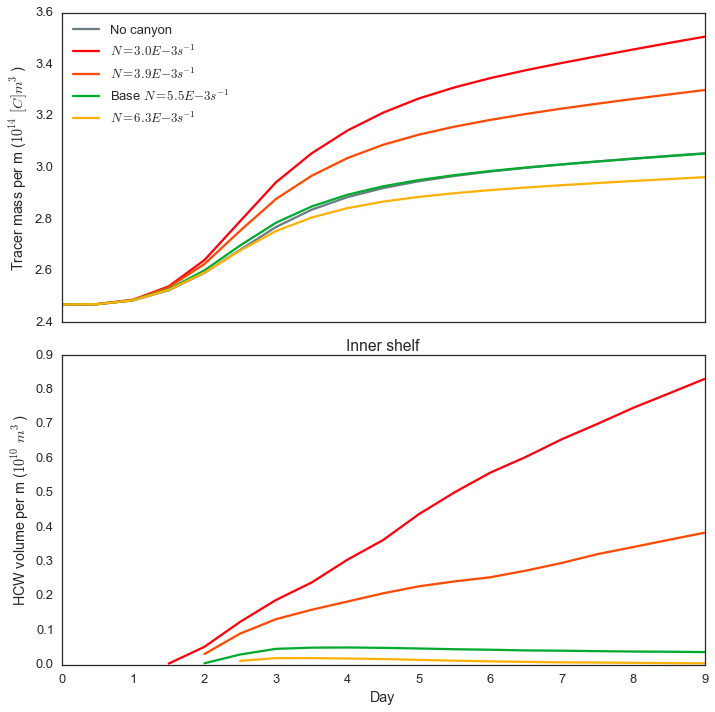

In [86]:
fig,(ax1,ax2) = plt.subplots(2,1, figsize = (10,10),sharex=True)

tt = np.arange(19)

ax1.plot(tt/2.,np.sum(TrMassNoCin,axis=1)/1.E14,sns.xkcd_rgb["battleship grey"],label='No canyon')
ax1.plot(tt/2.,np.sum(TrMass16in,axis=1)/1.E14,sns.xkcd_rgb["bright red"],label='$N=3.0E-3s^{-1}$')
ax1.plot(tt/2.,np.sum(TrMass14in,axis=1)/1.E14,sns.xkcd_rgb["blood orange"],label='$N=3.9E-3s^{-1}$')
ax1.plot(tt/2.,np.sum(TrMassin,axis=1)/1.E14,sns.xkcd_rgb["kelly green"],label='Base $N=5.5E-3s^{-1}$')
ax1.plot(tt/2.,np.sum(TrMass15in,axis=1)/1.E14,sns.xkcd_rgb["saffron"],label='$N=6.3E-3s^{-1}$')
   
ax2.plot(tt/2.,np.sum(HCWNoCin,axis=1)/1.E10,sns.xkcd_rgb["battleship grey"],label='No canyon')
ax2.plot(tt/2.,np.sum(HCW16in,axis=1)/1.E10,sns.xkcd_rgb["bright red"],label='$N=3.0E-3s^{-1}$')
ax2.plot(tt/2.,np.sum(HCW14in,axis=1)/1.E10,sns.xkcd_rgb["blood orange"],label='$N=3.9E-3s^{-1}$')
ax2.plot(tt/2.,np.sum(HCWin,axis=1)/1.E10,sns.xkcd_rgb["kelly green"],label='Base $N=5.5E-3s^{-1}$')
ax2.plot(tt/2.,np.sum(HCW15in,axis=1)/1.E10,sns.xkcd_rgb["saffron"],label='$N=6.3E-3s^{-1}$')
     
    
ax1.legend(loc=0)
ax2.set_xlabel('Day')
ax1.set_ylabel('Tracer mass per m ($10^{14}$ $[C]m^3$)')
ax2.set_ylabel('HCW volume per m ($10^{10}$ $m^3$)')
plt.title('Inner shelf')
plt.tight_layout()
plt.show()



## Changing latitude (f)

In [87]:
Tra = rout.getField(Ptracers18, 'Tr1')
Trb = rout.getField(Ptracers19, 'Tr1')

In [88]:
HCW18out,TrMass18out = HCW_Tracer_AlongShelf_Split(Tra,mask_NoC,30,rA,hFacC,drF,227,267,30,180,50)
HCW19out,TrMass19out = HCW_Tracer_AlongShelf_Split(Trb,mask_NoC,30,rA,hFacC,drF,227,267,30,180,50)

HCW18in,TrMass18in = HCW_Tracer_AlongShelf_Split(Tra,mask_NoC,30,rA,hFacC,drF,267,299,30,180,50)
HCW19in,TrMass19in = HCW_Tracer_AlongShelf_Split(Trb,mask_NoC,30,rA,hFacC,drF,267,299,30,180,50)


('tracer limit concentration is: ', 7.3974895)
('tracer limit concentration is: ', 7.3974895)
('tracer limit concentration is: ', 7.3974895)
('tracer limit concentration is: ', 7.3974895)


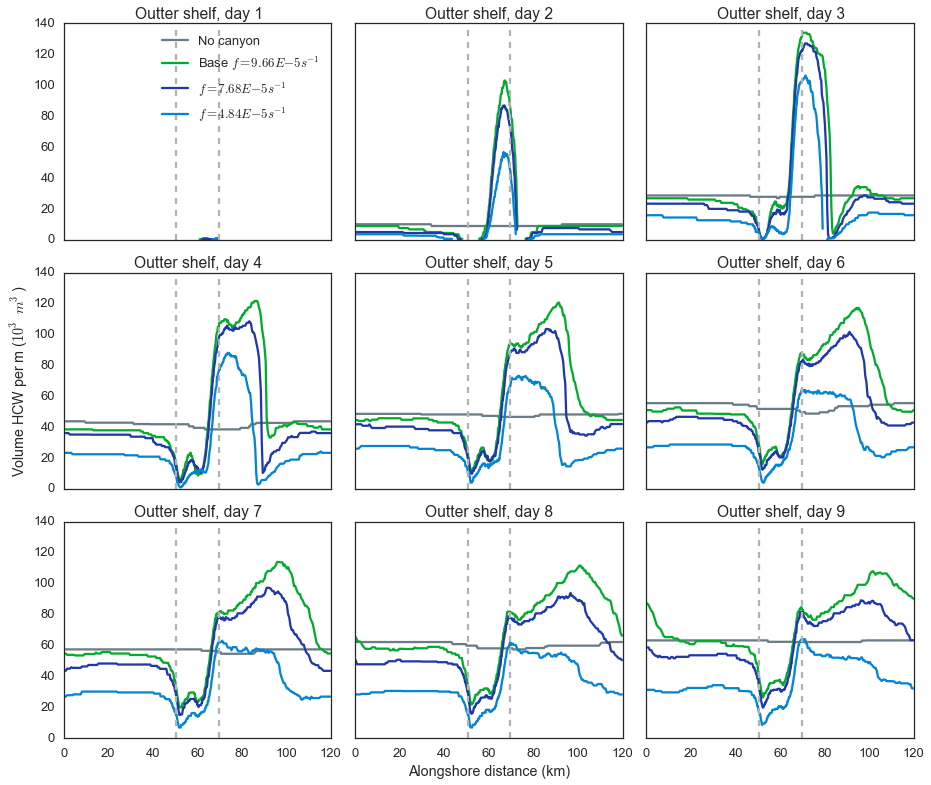

In [89]:
fig,((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9)) = plt.subplots(3,3, figsize = (13,11),sharex=True, sharey=True)

axlist = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9]

times = [2,4,6,8,10,12,14,16,18]
for ii,ax in zip(times,axlist):
    
    ax.plot(xc[1,:]/1000,HCWNoCout[ii,:]/(1000*dxf[0,:]),sns.xkcd_rgb["battleship grey"],label='No canyon')
    ax.plot(xc[1,:]/1000,HCWout[ii,:]/(1000*dxf[0,:]),sns.xkcd_rgb["kelly green"],label='Base $f=9.66E-5s^{-1}$')
    ax.plot(xc[1,:]/1000,HCW18out[ii,:]/(1000*dxf[0,:]),sns.xkcd_rgb["sapphire"],label='$f=7.68E-5s^{-1}$')
    ax.plot(xc[1,:]/1000,HCW19out[ii,:]/(1000*dxf[0,:]),sns.xkcd_rgb["cerulean"],label='$f=4.84E-5s^{-1}$')
    
    
    ax.set_title('Outter shelf, day %d' %(ii/2))
    plotCanyonPos(ax,xc[1,120]/1000,xc[1,240]/1000)

ax1.legend(loc=0)
ax8.set_xlabel('Alongshore distance (km)')
ax4.set_ylabel('Volume HCW per m ($10^3$ $m^3$)')
plt.tight_layout()

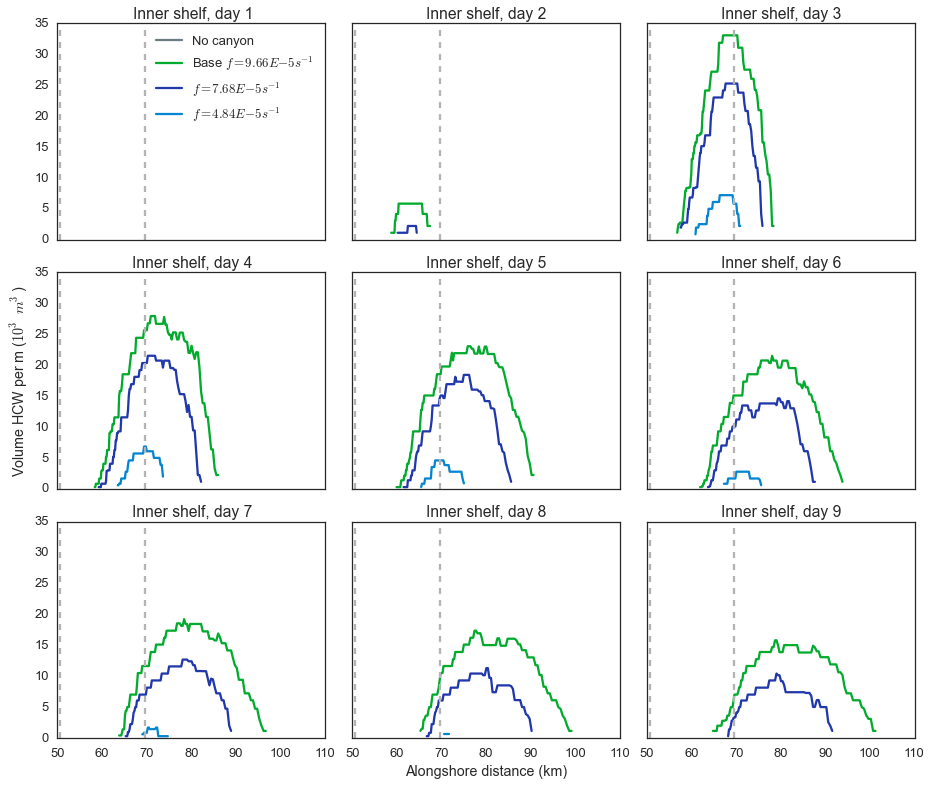

In [90]:
fig,((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9)) = plt.subplots(3,3, figsize = (13,11),sharex=True, sharey=True)

axlist = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9]

times = [2,4,6,8,10,12,14,16,18]
for ii,ax in zip(times,axlist):
    
    ax.plot(xc[1,:]/1000,HCWNoCin[ii,:]/(1000*dxf[0,:]),sns.xkcd_rgb["battleship grey"],label='No canyon')
    ax.plot(xc[1,:]/1000,HCWin[ii,:]/(1000*dxf[0,:]),sns.xkcd_rgb["kelly green"],label='Base $f=9.66E-5s^{-1}$')
    ax.plot(xc[1,:]/1000,HCW18in[ii,:]/(1000*dxf[0,:]),sns.xkcd_rgb["sapphire"],label='$f=7.68E-5s^{-1}$')
    ax.plot(xc[1,:]/1000,HCW19in[ii,:]/(1000*dxf[0,:]),sns.xkcd_rgb["cerulean"],label='$f=4.84E-5s^{-1}$')
    
    
    ax.set_title('Inner shelf, day %d' %(ii/2))
    plotCanyonPos(ax,xc[1,120]/1000,xc[1,240]/1000)

ax1.legend(loc=0)
ax8.set_xlabel('Alongshore distance (km)')
ax4.set_ylabel('Volume HCW per m ($10^3$ $m^3$)')
plt.tight_layout()

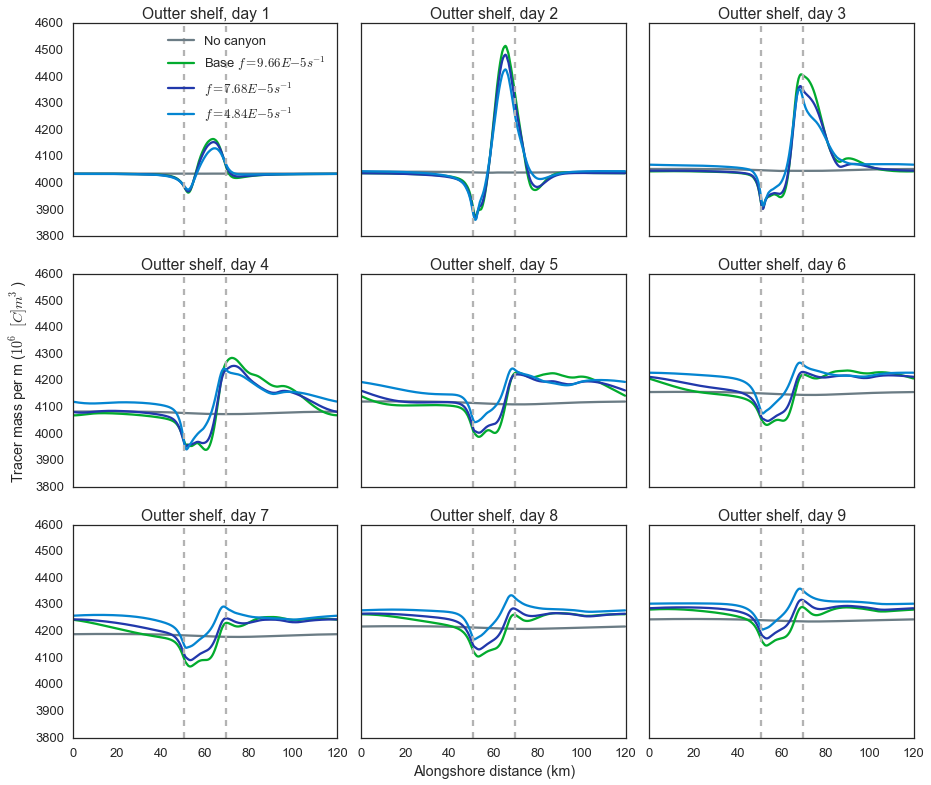

In [91]:
fig,((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9)) = plt.subplots(3,3, figsize = (13,11),sharex=True, sharey=True)

axlist = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9]

times = [2,4,6,8,10,12,14,16,18]
for ii,ax in zip(times,axlist):
    ax.plot(xc[1,:]/1000,TrMassNoCout[ii,:]/(1000000*dxf[0,:]),sns.xkcd_rgb["battleship grey"],label='No canyon')
    ax.plot(xc[1,:]/1000,TrMassout[ii,:]/(1000000*dxf[0,:]),sns.xkcd_rgb["kelly green"],label='Base $f=9.66E-5s^{-1}$')
    ax.plot(xc[1,:]/1000,TrMass18out[ii,:]/(1000000*dxf[0,:]),sns.xkcd_rgb["sapphire"],label='$f=7.68E-5s^{-1}$')
    ax.plot(xc[1,:]/1000,TrMass19out[ii,:]/(1000000*dxf[0,:]),sns.xkcd_rgb["cerulean"],label='$f=4.84E-5s^{-1}$')
    
    
    ax.set_title('Outter shelf, day %d' %(ii/2))
    plotCanyonPos(ax,xc[1,120]/1000,xc[1,240]/1000)

ax1.legend(loc=0)
ax8.set_xlabel('Alongshore distance (km)')
ax4.set_ylabel('Tracer mass per m ($10^6$ $[C]m^3$)')

plt.tight_layout()

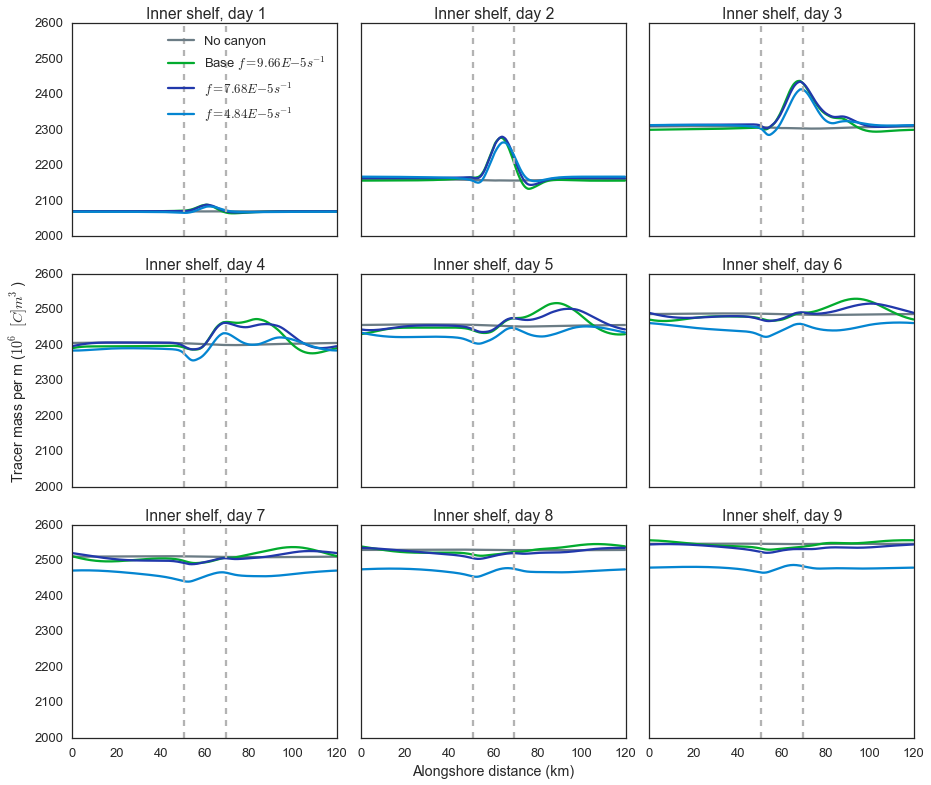

In [92]:
fig,((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9)) = plt.subplots(3,3, figsize = (13,11),sharex=True, sharey=True)

axlist = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9]

times = [2,4,6,8,10,12,14,16,18]
for ii,ax in zip(times,axlist):
    ax.plot(xc[1,:]/1000,TrMassNoCin[ii,:]/(1000000*dxf[0,:]),sns.xkcd_rgb["battleship grey"],label='No canyon')
    ax.plot(xc[1,:]/1000,TrMassin[ii,:]/(1000000*dxf[0,:]),sns.xkcd_rgb["kelly green"],label='Base $f=9.66E-5s^{-1}$')
    ax.plot(xc[1,:]/1000,TrMass18in[ii,:]/(1000000*dxf[0,:]),sns.xkcd_rgb["sapphire"],label='$f=7.68E-5s^{-1}$')
    ax.plot(xc[1,:]/1000,TrMass19in[ii,:]/(1000000*dxf[0,:]),sns.xkcd_rgb["cerulean"],label='$f=4.84E-5s^{-1}$')
    
    
    ax.set_title('Inner shelf, day %d' %(ii/2))
    plotCanyonPos(ax,xc[1,120]/1000,xc[1,240]/1000)

ax1.legend(loc=0)
ax8.set_xlabel('Alongshore distance (km)')
ax4.set_ylabel('Tracer mass per m ($10^6$ $[C]m^3$)')

plt.tight_layout()

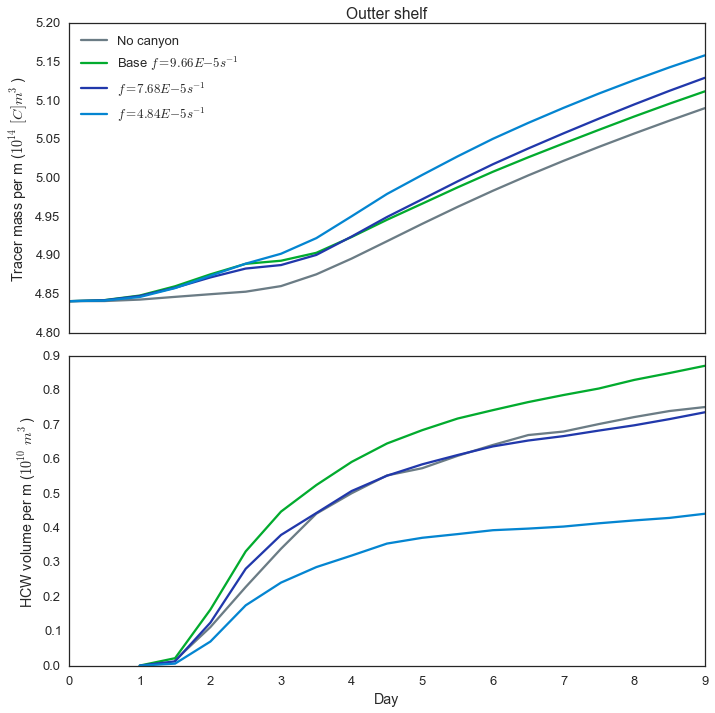

In [96]:
fig,(ax1,ax2) = plt.subplots(2,1, figsize = (10,10),sharex=True)

tt = np.arange(19)


ax2.plot(tt/2.,np.sum(HCWNoCout,axis=1)/1.E10,sns.xkcd_rgb["battleship grey"],label='No canyon')
ax2.plot(tt/2.,np.sum(HCWout,axis=1)/1.E10,sns.xkcd_rgb["kelly green"],label='Base $f=9.66E-5s^{-1}$')
ax2.plot(tt/2.,np.sum(HCW18out,axis=1)/1.E10,sns.xkcd_rgb["sapphire"],label='$f=7.68E-5s^{-1}$')
ax2.plot(tt/2.,np.sum(HCW19out,axis=1)/1.E10,sns.xkcd_rgb["cerulean"],label='f=4.84E-5s^{-1}$')
 
ax1.plot(tt/2.,np.sum(TrMassNoCout,axis=1)/1.E14,sns.xkcd_rgb["battleship grey"],label='No canyon')
ax1.plot(tt/2.,np.sum(TrMassout,axis=1)/1.E14,sns.xkcd_rgb["kelly green"],label='Base $f=9.66E-5s^{-1}$')
ax1.plot(tt/2.,np.sum(TrMass18out,axis=1)/1.E14,sns.xkcd_rgb["sapphire"],label='$f=7.68E-5s^{-1}$')
ax1.plot(tt/2.,np.sum(TrMass19out,axis=1)/1.E14,sns.xkcd_rgb["cerulean"],label='$f=4.84E-5s^{-1}$')
        
ax1.set_title('Outter shelf')   
ax1.legend(loc=0)
ax2.set_xlabel('Day')
ax1.set_ylabel('Tracer mass per m ($10^{14}$ $[C]m^3$)')
ax2.set_ylabel('HCW volume per m ($10^{10}$ $m^3$)')

plt.tight_layout()
plt.show()



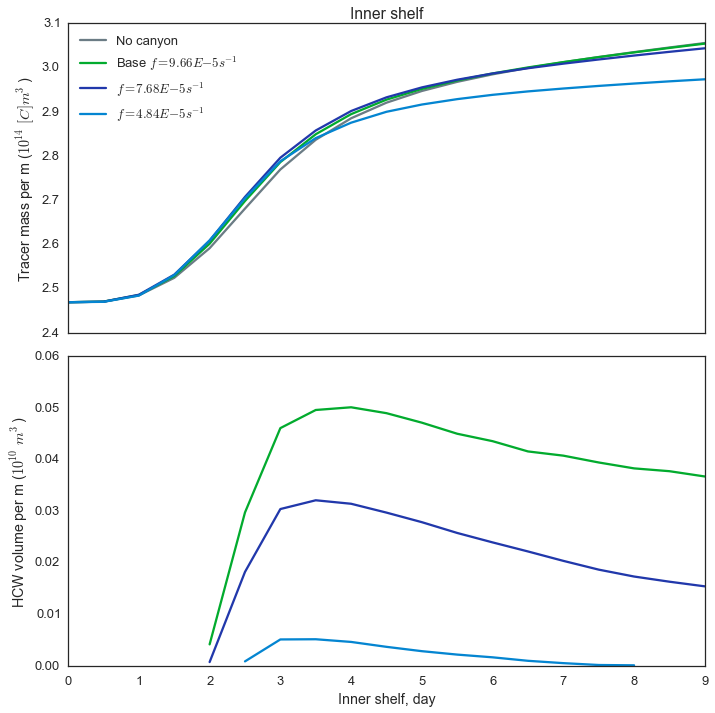

In [97]:
fig,(ax1,ax2) = plt.subplots(2,1, figsize = (10,10),sharex=True)

tt = np.arange(19)


ax2.plot(tt/2.,np.sum(HCWNoCin,axis=1)/1.E10,sns.xkcd_rgb["battleship grey"],label='No canyon')
ax2.plot(tt/2.,np.sum(HCWin,axis=1)/1.E10,sns.xkcd_rgb["kelly green"],label='Base $f=9.66E-5s^{-1}$')
ax2.plot(tt/2.,np.sum(HCW18in,axis=1)/1.E10,sns.xkcd_rgb["sapphire"],label='$f=7.68E-5s^{-1}$')
ax2.plot(tt/2.,np.sum(HCW19in,axis=1)/1.E10,sns.xkcd_rgb["cerulean"],label='f=4.84E-5s^{-1}$')
 
ax1.plot(tt/2.,np.sum(TrMassNoCin,axis=1)/1.E14,sns.xkcd_rgb["battleship grey"],label='No canyon')
ax1.plot(tt/2.,np.sum(TrMassin,axis=1)/1.E14,sns.xkcd_rgb["kelly green"],label='Base $f=9.66E-5s^{-1}$')
ax1.plot(tt/2.,np.sum(TrMass18in,axis=1)/1.E14,sns.xkcd_rgb["sapphire"],label='$f=7.68E-5s^{-1}$')
ax1.plot(tt/2.,np.sum(TrMass19in,axis=1)/1.E14,sns.xkcd_rgb["cerulean"],label='$f=4.84E-5s^{-1}$')
        
ax1.set_title('Inner shelf')     
ax1.legend(loc=0)
ax2.set_xlabel('Inner shelf, day')
ax1.set_ylabel('Tracer mass per m ($10^{14}$ $[C]m^3$)')
ax2.set_ylabel('HCW volume per m ($10^{10}$ $m^3$)')
plt.tight_layout()
plt.show()



### Process the rest of the runs and save dataframe


In [98]:
# Process the rest of the runs to save pandas dataframe
Ptracers02 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run02/ptracersGlob.nc' 
Ptracers04 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run04/ptracersGlob.nc' 
Ptracers20 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run20/ptracersGlob.nc' 

Tra = rout.getField(Ptracers02, 'Tr1')
Trb = rout.getField(Ptracers04, 'Tr1')
Trc = rout.getField(Ptracers20, 'Tr2')

HCW02out,TrMass02out = HCW_Tracer_AlongShelf_Split(Tra,mask_NoC,30,rA,hFacC,drF,227,267,30,180,50)
HCW04out,TrMass04out = HCW_Tracer_AlongShelf_Split(Trb,mask_NoC,30,rA,hFacC,drF,227,267,30,180,50)
HCW20out,TrMass20out = HCW_Tracer_AlongShelf_Split(Trc,mask_NoC,30,rA,hFacC,drF,227,267,30,180,50)

HCW02in,TrMass02in = HCW_Tracer_AlongShelf_Split(Tra,mask_NoC,30,rA,hFacC,drF,267,299,30,180,50)
HCW04in,TrMass04in = HCW_Tracer_AlongShelf_Split(Trb,mask_NoC,30,rA,hFacC,drF,267,299,30,180,50)
HCW20in,TrMass20in = HCW_Tracer_AlongShelf_Split(Trc,mask_NoC,30,rA,hFacC,drF,267,299,30,180,50)


('tracer limit concentration is: ', 7.3974895)
('tracer limit concentration is: ', 7.3974895)
('tracer limit concentration is: ', 7.3974895)
('tracer limit concentration is: ', 7.3974895)
('tracer limit concentration is: ', 7.3974895)
('tracer limit concentration is: ', 7.3974895)


In [99]:
runs = ['02','03','04','07','11','12','14','15','16','17','18','19','20','043D','053D','063D','073D']

DHCW_dataOut = np.zeros(len(runs))
DTrMass_dataOut = np.zeros(len(runs))
# HCW
DHCW_dataOut[0] = ((np.sum(HCW02out,axis=1)[18]-np.sum(HCW02out,axis=1)[10])/(4*3600.0*24))
DHCW_dataOut[1] = ((np.sum(HCWout,axis=1)[18]-np.sum(HCWout,axis=1)[10])/(4*3600.0*24))
DHCW_dataOut[2] = ((np.sum(HCW04out,axis=1)[18]-np.sum(HCW04out,axis=1)[10])/(4*3600.0*24))
DHCW_dataOut[3] = ((np.sum(HCWNoCout,axis=1)[18]-np.sum(HCWNoCout,axis=1)[10])/(4*3600.0*24))
DHCW_dataOut[4] = ((np.sum(HCW11out,axis=1)[18]-np.sum(HCW11out,axis=1)[10])/(4*3600.0*24))
DHCW_dataOut[5] = ((np.sum(HCW12out,axis=1)[18]-np.sum(HCW12out,axis=1)[10])/(4*3600.0*24))
DHCW_dataOut[6] = ((np.sum(HCW14out,axis=1)[18]-np.sum(HCW14out,axis=1)[10])/(4*3600.0*24))
DHCW_dataOut[7] = ((np.sum(HCW15out,axis=1)[18]-np.sum(HCW15out,axis=1)[10])/(4*3600.0*24))
DHCW_dataOut[8] = ((np.sum(HCW16out,axis=1)[18]-np.sum(HCW16out,axis=1)[10])/(4*3600.0*24))
DHCW_dataOut[9] = ((np.sum(HCW17out,axis=1)[18]-np.sum(HCW17out,axis=1)[10])/(4*3600.0*24))
DHCW_dataOut[10] = ((np.sum(HCW18out,axis=1)[18]-np.sum(HCW18out,axis=1)[10])/(4*3600.0*24))
DHCW_dataOut[11] = ((np.sum(HCW19out,axis=1)[18]-np.sum(HCW19out,axis=1)[10])/(4*3600.0*24))
DHCW_dataOut[12] = ((np.sum(HCW20out,axis=1)[18]-np.sum(HCW20out,axis=1)[10])/(4*3600.0*24))

DHCW_dataOut[13] = ((np.sum(HCW043Dout,axis=1)[18]-np.sum(HCW043Dout,axis=1)[10])/(4*3600.0*24))
DHCW_dataOut[14] = ((np.sum(HCW053Dout,axis=1)[18]-np.sum(HCW053Dout,axis=1)[10])/(4*3600.0*24))
DHCW_dataOut[15] = ((np.sum(HCW063Dout,axis=1)[18]-np.sum(HCW063Dout,axis=1)[10])/(4*3600.0*24))
DHCW_dataOut[16] = ((np.sum(HCW073Dout,axis=1)[18]-np.sum(HCW073Dout,axis=1)[10])/(4*3600.0*24))

 

#Tracer mass
DTrMass_dataOut[0] = ((np.sum(TrMass02out,axis=1)[18]-np.sum(TrMass02out,axis=1)[10])/(4*3600.0*24))
DTrMass_dataOut[1] =((np.sum(TrMassout,axis=1)[18]-np.sum(TrMassout,axis=1)[10])/(4*3600.0*24))
DTrMass_dataOut[2] =((np.sum(TrMass04out,axis=1)[18]-np.sum(TrMass04out,axis=1)[10])/(4*3600.0*24))
DTrMass_dataOut[3] =((np.sum(TrMassNoCout,axis=1)[18]-np.sum(TrMassNoCout,axis=1)[10])/(4*3600.0*24))
DTrMass_dataOut[4] =((np.sum(TrMass11out,axis=1)[18]-np.sum(TrMass11out,axis=1)[10])/(4*3600.0*24))
DTrMass_dataOut[5] =((np.sum(TrMass12out,axis=1)[18]-np.sum(TrMass12out,axis=1)[10])/(4*3600.0*24))
DTrMass_dataOut[6] =((np.sum(TrMass14out,axis=1)[18]-np.sum(TrMass14out,axis=1)[10])/(4*3600.0*24))
DTrMass_dataOut[7] =((np.sum(TrMass15out,axis=1)[18]-np.sum(TrMass15out,axis=1)[10])/(4*3600.0*24))
DTrMass_dataOut[8] =((np.sum(TrMass16out,axis=1)[18]-np.sum(TrMass16out,axis=1)[10])/(4*3600.0*24))
DTrMass_dataOut[9] =((np.sum(TrMass17out,axis=1)[18]-np.sum(TrMass17out,axis=1)[10])/(4*3600.0*24))
DTrMass_dataOut[10] =((np.sum(TrMass18out,axis=1)[18]-np.sum(TrMass18out,axis=1)[10])/(4*3600.0*24))
DTrMass_dataOut[11] =((np.sum(TrMass19out,axis=1)[18]-np.sum(TrMass19out,axis=1)[10])/(4*3600.0*24))
DTrMass_dataOut[12] =((np.sum(TrMass20out,axis=1)[18]-np.sum(TrMass20out,axis=1)[10])/(4*3600.0*24))

 
DTrMass_dataOut[13] =((np.sum(TrMass043Dout,axis=1)[18]-np.sum(TrMass043Dout,axis=1)[10])/(4*3600.0*24))
DTrMass_dataOut[14] =((np.sum(TrMass053Dout,axis=1)[18]-np.sum(TrMass053Dout,axis=1)[10])/(4*3600.0*24))
DTrMass_dataOut[15] =((np.sum(TrMass063Dout,axis=1)[18]-np.sum(TrMass063Dout,axis=1)[10])/(4*3600.0*24))
DTrMass_dataOut[16] =((np.sum(TrMass073Dout,axis=1)[18]-np.sum(TrMass073Dout,axis=1)[10])/(4*3600.0*24))

In [100]:
runs = ['02','03','04','07','11','12','14','15','16','17','18','19','20','043D','053D','063D','073D']

DHCW_dataIn = np.zeros(len(runs))
DTrMass_dataIn = np.zeros(len(runs))
# HCW
DHCW_dataIn[0] = ((np.sum(HCW02in,axis=1)[18]-np.sum(HCW02in,axis=1)[10])/(4*3600.0*24))
DHCW_dataIn[1] = ((np.sum(HCWin,axis=1)[18]-np.sum(HCWin,axis=1)[10])/(4*3600.0*24))
DHCW_dataIn[2] = ((np.sum(HCW04in,axis=1)[18]-np.sum(HCW04in,axis=1)[10])/(4*3600.0*24))
DHCW_dataIn[3] = ((np.sum(HCWNoCin,axis=1)[18]-np.sum(HCWNoCin,axis=1)[10])/(4*3600.0*24))
DHCW_dataIn[4] = ((np.sum(HCW11in,axis=1)[18]-np.sum(HCW11in,axis=1)[10])/(4*3600.0*24))
DHCW_dataIn[5] = ((np.sum(HCW12in,axis=1)[18]-np.sum(HCW12in,axis=1)[10])/(4*3600.0*24))
DHCW_dataIn[6] = ((np.sum(HCW14in,axis=1)[18]-np.sum(HCW14in,axis=1)[10])/(4*3600.0*24))
DHCW_dataIn[7] = ((np.sum(HCW15in,axis=1)[18]-np.sum(HCW15in,axis=1)[10])/(4*3600.0*24))
DHCW_dataIn[8] = ((np.sum(HCW16in,axis=1)[18]-np.sum(HCW16in,axis=1)[10])/(4*3600.0*24))
DHCW_dataIn[9] = ((np.sum(HCW17in,axis=1)[18]-np.sum(HCW17in,axis=1)[10])/(4*3600.0*24))
DHCW_dataIn[10] = ((np.sum(HCW18in,axis=1)[18]-np.sum(HCW18in,axis=1)[10])/(4*3600.0*24))
DHCW_dataIn[11] = ((np.sum(HCW19in,axis=1)[18]-np.sum(HCW19in,axis=1)[10])/(4*3600.0*24))
DHCW_dataIn[12] = ((np.sum(HCW20in,axis=1)[18]-np.sum(HCW20in,axis=1)[10])/(4*3600.0*24))

DHCW_dataIn[13] = ((np.sum(HCW043Din,axis=1)[18]-np.sum(HCW043Din,axis=1)[10])/(4*3600.0*24))
DHCW_dataIn[14] = ((np.sum(HCW053Din,axis=1)[18]-np.sum(HCW053Din,axis=1)[10])/(4*3600.0*24))
DHCW_dataIn[15] = ((np.sum(HCW063Din,axis=1)[18]-np.sum(HCW063Din,axis=1)[10])/(4*3600.0*24))
DHCW_dataIn[16] = ((np.sum(HCW073Din,axis=1)[18]-np.sum(HCW073Din,axis=1)[10])/(4*3600.0*24))

 

#Tracer mass
DTrMass_dataIn[0] = ((np.sum(TrMass02in,axis=1)[18]-np.sum(TrMass02in,axis=1)[10])/(4*3600.0*24))
DTrMass_dataIn[1] =((np.sum(TrMassin,axis=1)[18]-np.sum(TrMassin,axis=1)[10])/(4*3600.0*24))
DTrMass_dataIn[2] =((np.sum(TrMass04in,axis=1)[18]-np.sum(TrMass04in,axis=1)[10])/(4*3600.0*24))
DTrMass_dataIn[3] =((np.sum(TrMassNoCin,axis=1)[18]-np.sum(TrMassNoCin,axis=1)[10])/(4*3600.0*24))
DTrMass_dataIn[4] =((np.sum(TrMass11in,axis=1)[18]-np.sum(TrMass11in,axis=1)[10])/(4*3600.0*24))
DTrMass_dataIn[5] =((np.sum(TrMass12in,axis=1)[18]-np.sum(TrMass12in,axis=1)[10])/(4*3600.0*24))
DTrMass_dataIn[6] =((np.sum(TrMass14in,axis=1)[18]-np.sum(TrMass14in,axis=1)[10])/(4*3600.0*24))
DTrMass_dataIn[7] =((np.sum(TrMass15in,axis=1)[18]-np.sum(TrMass15in,axis=1)[10])/(4*3600.0*24))
DTrMass_dataIn[8] =((np.sum(TrMass16in,axis=1)[18]-np.sum(TrMass16in,axis=1)[10])/(4*3600.0*24))
DTrMass_dataIn[9] =((np.sum(TrMass17in,axis=1)[18]-np.sum(TrMass17in,axis=1)[10])/(4*3600.0*24))
DTrMass_dataIn[10] =((np.sum(TrMass18in,axis=1)[18]-np.sum(TrMass18in,axis=1)[10])/(4*3600.0*24))
DTrMass_dataIn[11] =((np.sum(TrMass19in,axis=1)[18]-np.sum(TrMass19in,axis=1)[10])/(4*3600.0*24))
DTrMass_dataIn[12] =((np.sum(TrMass20in,axis=1)[18]-np.sum(TrMass20in,axis=1)[10])/(4*3600.0*24))

 
DTrMass_dataIn[13] =((np.sum(TrMass043Din,axis=1)[18]-np.sum(TrMass043Din,axis=1)[10])/(4*3600.0*24))
DTrMass_dataIn[14] =((np.sum(TrMass053Din,axis=1)[18]-np.sum(TrMass053Din,axis=1)[10])/(4*3600.0*24))
DTrMass_dataIn[15] =((np.sum(TrMass063Din,axis=1)[18]-np.sum(TrMass063Din,axis=1)[10])/(4*3600.0*24))
DTrMass_dataIn[16] =((np.sum(TrMass073Din,axis=1)[18]-np.sum(TrMass073Din,axis=1)[10])/(4*3600.0*24))

/home/kramosmu/anaconda/lib/python2.7/site-packages/numpy/ma/core.py:3900: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


In [101]:
# save data frame
raw_data = {'RunNum':runs,'deltaHCW_Out': DHCW_dataOut,'deltaTrMass_Out': DTrMass_dataOut,'deltaHCW_In': DHCW_dataIn,
            'deltaTrMass_In': DTrMass_dataIn}

df = pd.DataFrame(raw_data, columns = ['eRunNum','deltaHCW_Out','deltaTrMass_Out','deltaHCW_In','deltaTrMass_In'])

filename = ('results/metricsDataFrames/DeltaTrInOutShelf.csv' )
df.to_csv(filename)